In [1]:
# load libraries
library(tidyr)
library(dplyr)
library(stringr)
library(ggplot2)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# set jupyter and r to display more rows and columns
options(repr.matrix.max.rows=100, repr.matrix.max.cols=200)

In [3]:
# read in csv file
business <- read.csv(file='C:/Users/Tim/yelp_academic_dataset_business.csv', stringsAsFactors=FALSE)

dim(business)
head(business, 4)


[1] 42153   105

business_id            attributes.Ambience.divey
1 vcNAWiLM4dR7D2nwwJ7nCA    NA                    
2 JwUE5GmEO-sH1FuwJgKBlQ FALSE                    
3 uGykseHzyS5xAMWoN6YUqA FALSE                    
4 LRKJF43s9-3jG9Lgx4zODg    NA                    
  attributes.Dietary.Restrictions.vegan attributes.Happy.Hour
1 NA                                    NA                   
2 NA                                    NA                   
3 NA                                    NA                   
4 NA                                    NA                   
  hours.Thursday.open attributes.Order.at.Counter
1 8:00                NA                         
2                     NA                         
3 6:00                NA                         
4 10:30               NA                         
  attributes.Hair.Types.Specialized.In.africanamerican
1 NA                                                  
2 NA                                                  
3 NA                                                  
4 NA                                                  
  attributes.Hair.Types.Specialized.In.kids attributes.BYOB hours.Friday.open
1 NA                                        NA              8:00             
2 NA                                        NA                               
3 NA                                        NA              6:00             
4 NA                                        NA              10:30            
  categories                                           latitude
1 Doctors;Health & Medical                             33.49931
2 Restaurants                                          43.23889
3 American (Traditional);Restaurants                   43.25227
4 Food;Ice Cream & Frozen Yogurt;Fast Food;Restaurants 43.25104
  attributes.Outdoor.Seating attributes.Alcohol attributes.Ambience.classy
1    NA                                            NA                     
2 FALSE                      none               FALSE                     
3 FALSE                                         FALSE                     
4    NA                                            NA                     
  attributes.Payment.Types.mastercard attributes.Parking.lot
1 NA                                    NA                  
2 NA                                  TRUE                  
3 NA                                  TRUE                  
4 NA                                  TRUE                  
  attributes.Ambience.touristy attributes.Corkage hours.Tuesday.open
1    NA                        NA                 8:00              
2 FALSE                        NA                                   
3 FALSE                        NA                 6:00              
4    NA                        NA                 10:30             
  attributes.Good.For.brunch attributes.Payment.Types.amex
1    NA                      NA                           
2 FALSE                      NA                           
3  TRUE                      NA                           
4    NA                      NA                           
  name                       hours.Monday.open attributes.Waiter.Service
1 Eric Goldberg, MD          8:00                NA                     
2 Pine Cone Restaurant                         TRUE                     
3 Deforest Family Restaurant 6:00              TRUE                     
4 Culver's                   10:30               NA                     
  attributes.Parking.street attributes.Ambience.hipster attributes.BYOB.Corkage
1    NA                        NA                                              
2 FALSE                     FALSE                                              
3 FALSE                     FALSE                                              
4 FALSE                        NA                                              
  attributes.Hair.Types.Specialized.In.straightperms attributes.Music.live
1 NA                                      

In [4]:
head(business$categories, 20)

[1] "Doctors;Health & Medical"                                                                       
 [2] "Restaurants"                                                                                    
 [3] "American (Traditional);Restaurants"                                                             
 [4] "Food;Ice Cream & Frozen Yogurt;Fast Food;Restaurants"                                           
 [5] "Chinese;Restaurants"                                                                            
 [6] "Television Stations;Mass Media"                                                                 
 [7] "Home Services;Heating & Air Conditioning/HVAC"                                                  
 [8] "Libraries;Public Services & Government"                                                         
 [9] "American (Traditional);Restaurants"                                                             
[10] "Veterinarians;Pets"                                                                             
[11] "Bars;American (Traditional);Nightlife;Lounges;Restaurants"                                      
[12] "Hotels & Travel;Bed & Breakfast;Event Planning & Services;Hotels"                               
[13] "Active Life;Bowling"                                                                            
[14] "Pizza;Restaurants"                                                                              
[15] "Chinese;Restaurants"                                                                            
[16] "Event Planning & Services;Party & Event Planning;Caterers"                                      
[17] "Party & Event Planning;Asian Fusion;Event Planning & Services;Venues & Event Spaces;Restaurants"
[18] "Mexican;Restaurants"                                                                            
[19] "Auto Repair;Automotive;Auto Parts & Supplies;Car Dealers"                                       
[20] "Active Life;Arts & Entertainment;Stadiums & Arenas"

In [5]:
head(business$type, 50)

[1] "business" "business" "business" "business" "business" "business"
 [7] "business" "business" "business" "business" "business" "business"
[13] "business" "business" "business" "business" "business" "business"
[19] "business" "business" "business" "business" "business" "business"
[25] "business" "business" "business" "business" "business" "business"
[31] "business" "business" "business" "business" "business" "business"
[37] "business" "business" "business" "business" "business" "business"
[43] "business" "business" "business" "business" "business" "business"
[49] "business" "business"

In [6]:
glimpse(business)

Observations: 42,153
Variables: 105
$ business_id                                          <chr> "vcNAWiLM4dR7D...
$ attributes.Ambience.divey                            <lgl> NA, FALSE, FAL...
$ attributes.Dietary.Restrictions.vegan                <lgl> NA, NA, NA, NA...
$ attributes.Happy.Hour                                <lgl> NA, NA, NA, NA...
$ hours.Thursday.open                                  <chr> "8:00", "", "6...
$ attributes.Order.at.Counter                          <lgl> NA, NA, NA, NA...
$ attributes.Hair.Types.Specialized.In.africanamerican <lgl> NA, NA, NA, NA...
$ attributes.Hair.Types.Specialized.In.kids            <lgl> NA, NA, NA, NA...
$ attributes.BYOB                                      <lgl> NA, NA, NA, NA...
$ hours.Friday.open                                    <chr> "8:00", "", "6...
$ categories                                           <chr> "Doctors;Healt...
$ latitude                                             <dbl> 33.49931, 43.2...
$ attributes.Out

In [7]:
data <- business %>%
  mutate(is_restaurant = str_detect(categories, 'Restaurants')) %>%
  filter(state == "AZ", is_restaurant) %>%
  arrange(desc(review_count))

head(data)
        

business_id            attributes.Ambience.divey
1 VVeogjZya58oiTxK7qUjAQ FALSE                    
2 JokKtdXU7zXHcr20Lrk29A FALSE                    
3 V1nEpIRmEa1768oj_tuxeQ FALSE                    
4 EWMwV5V9BxNs_U6nNVMeqw FALSE                    
5 SDwYQ6eSu1htn8vHWv128g FALSE                    
6 WNy1uzcmm_UHmTyR--o5IA FALSE                    
  attributes.Dietary.Restrictions.vegan attributes.Happy.Hour
1    NA                                   NA                 
2    NA                                 TRUE                 
3    NA                                   NA                 
4    NA                                 TRUE                 
5  TRUE                                 TRUE                 
6 FALSE                                 TRUE                 
  hours.Thursday.open attributes.Order.at.Counter
1 11:00                TRUE                      
2 11:00                  NA                      
3 11:00                TRUE                      
4 11:00               FALSE                      
5 11:00               FALSE                      
6 11:00                  NA                      
  attributes.Hair.Types.Specialized.In.africanamerican
1 NA                                                  
2 NA                                                  
3 NA                                                  
4 NA                                                  
5 NA                                                  
6 NA                                                  
  attributes.Hair.Types.Specialized.In.kids attributes.BYOB hours.Friday.open
1 NA                                        FALSE           11:00            
2 NA                                        FALSE           11:00            
3 NA                                           NA           11:00            
4 NA                                        FALSE           11:00            
5 NA                                        FALSE           11:00            
6 NA                                           NA           11:00            
  categories                                                      latitude
1 Italian;Pizza;Sandwiches;Restaurants                            33.44923
2 Bars;Food;Breweries;Pubs;Nightlife;American (New);Restaurants   33.41957
3 Italian;Pizza;Sandwiches;Restaurants                            33.45496
4 Bars;Mediterranean;Nightlife;Lounges;American (New);Restaurants 33.49170
5 Wine Bars;Bars;Restaurants;Nightlife;Italian                    33.50219
6 Pubs;Bars;Nightlife;British;Restaurants                         33.42273
  attributes.Outdoor.Seating attributes.Alcohol attributes.Ambience.classy
1 FALSE                      beer_and_wine      FALSE                     
2  TRUE                      full_bar           FALSE                     
3  TRUE                      beer_and_wine      FALSE                     
4  TRUE                      full_bar           FALSE                     
5  TRUE                      beer_and_wine      FALSE                     
6  TRUE                      full_bar           FALSE                     
  attributes.Payment.Types.mastercard attributes.Parking.lot
1   NA                                 TRUE                 
2   NA                                 TRUE                 
3   NA                                 TRUE                 
4 TRUE                                 TRUE                 
5   NA                                FALSE                 
6   NA                                 TRUE                 
  attributes.Ambience.touristy attributes.Corkage hours.Tuesday.open
1 FALSE                        FALSE              11:00             
2 FALSE                        FALSE              11:00             
3 FALSE                        FALSE              11:00             
4 FALSE                        FALSE              11:00             
5 FALSE                        FALSE              11:00             
6 FALSE                        FALSE   

In [8]:
# load summary tools library
library(summarytools)

# look at column cahracterics
view(dfSummary(data[1:105]))



Warning message:
"package 'summarytools' was built under R version 3.6.3"Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp
For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')
Switching method to 'browser'
Output file written: C:\Users\Tim\AppData\Local\Temp\RtmpshDIXe\file7849646308.html


In [9]:
# write preliminarily cleaned data to file, so can open in python for secondary eda (possible preliminary eda, too)
write.csv(data, 'prelim_df.csv')

In [10]:
names(data)

[1] "business_id"                                         
  [2] "attributes.Ambience.divey"                           
  [3] "attributes.Dietary.Restrictions.vegan"               
  [4] "attributes.Happy.Hour"                               
  [5] "hours.Thursday.open"                                 
  [6] "attributes.Order.at.Counter"                         
  [7] "attributes.Hair.Types.Specialized.In.africanamerican"
  [8] "attributes.Hair.Types.Specialized.In.kids"           
  [9] "attributes.BYOB"                                     
 [10] "hours.Friday.open"                                   
 [11] "categories"                                          
 [12] "latitude"                                            
 [13] "attributes.Outdoor.Seating"                          
 [14] "attributes.Alcohol"                                  
 [15] "attributes.Ambience.classy"                          
 [16] "attributes.Payment.Types.mastercard"                 
 [17] "attributes.Parking.lot"                              
 [18] "attributes.Ambience.touristy"                        
 [19] "attributes.Corkage"                                  
 [20] "hours.Tuesday.open"                                  
 [21] "attributes.Good.For.brunch"                          
 [22] "attributes.Payment.Types.amex"                       
 [23] "name"                                                
 [24] "hours.Monday.open"                                   
 [25] "attributes.Waiter.Service"                           
 [26] "attributes.Parking.street"                           
 [27] "attributes.Ambience.hipster"                         
 [28] "attributes.BYOB.Corkage"                             
 [29] "attributes.Hair.Types.Specialized.In.straightperms"  
 [30] "attributes.Music.live"                               
 [31] "attributes.Dietary.Restrictions.dairy.free"          
 [32] "attributes.Music.background_music"                   
 [33] "attributes.Price.Range"                              
 [34] "attributes.Good.For.breakfast"                       
 [35] "attributes.Parking.garage"                           
 [36] "attributes.Music.karaoke"                            
 [37] "attributes.Good.For.Dancing"                         
 [38] "review_count"                                        
 [39] "attributes.Hair.Types.Specialized.In.asian"          
 [40] "state"                                               
 [41] "attributes.Accepts.Credit.Cards"                     
 [42] "hours.Friday.close"                                  
 [43] "attributes.Good.For.lunch"                           
 [44] "attributes.Good.For.Kids"                            
 [45] "attributes.Parking.valet"                            
 [46] "attributes.Take.out"                                 
 [47] "full_address"                                        
 [48] "hours.Thursday.close"                                
 [49] "attributes.Hair.Types.Specialized.In.coloring"       
 [50] "attributes.Payment.Types.cash_only"                  
 [51] "attributes.Good.For.dessert"                         
 [52] "attributes.Music.video"                              
 [53] "attributes.Dietary.Restrictions.halal"               
 [54] "attributes.Takes.Reservations"                       
 [55] "hours.Saturday.open"                                 
 [56] "attributes.Ages.Allowed"                             
 [57] "attributes.Ambience.trendy"                          
 [58] "attributes.Delivery"                                 
 [59] "hours.Wednesday.close"                               
 [60] "attributes.Wi.Fi"                                    
 [61] "open"                                                
 [62] "city"                                                
 [63] "attributes.Payment.Types.discover"                   
 [64] "attributes.Wheelchair.Accessible"                    
 [65] "attributes.Dietary.Restrictions.gluten.free"         
 [66] "stars"                        

In [11]:
# data['stars'].value_counts()

In [12]:
dim(data)

[1] 7439  106

In [13]:
# clean up column names
# convert all columns names to lowercase
names(data) <- tolower(names(data))

# replace columns containing '.' with '_'
names(data) <- str_replace_all(names(data), '\\.', '_')

# determine number of columns before removal
ncol(data)


[1] 106

In [14]:
# load dplyr library
library(dplyr)

# determine duplicate columns (column 80 - attributes_good_for_kids - duplicate of column 44)
idx = which(duplicated(names(data)))

print(idx)

# drop duplicate column names
new_data = data[,-idx]

# change new_data back to data
data = new_data


[1] 80


In [15]:
# ALSO NEED TO DROP DUPLICATE ROWS

# check for 100% duplicated rows
any(duplicated(data))
# duplicated(data) 

[1] FALSE

In [16]:
# check for duplicates in business id column

duplicated(data$business_id)
# note that there are duplicates of "#NAME?"
# recheck after deleting rows with "#NAME?"

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [17]:
# drop is_restaurant and state - 100% one category and/or no longer needed
data <- data %>%
  select(-contains("is_restaurant")) %>%
  select(-contains("state")) %>%
# type - 100% business - no need for
  select(-contains("type"))




In [18]:
# drop columns containing hair, accepts insurance, appointment_only - doesn't apply to restuarants
data <- data %>%
  select(-contains("hair")) %>%
  select(-contains("appointment")) %>%
  select(-contains("insurance")) 



In [19]:
# drop groups of variables with more than 25% missing values
data <- data %>%
  select(-contains("payment_types")) %>%
  select(-contains("dietary")) %>%
  select(-contains("music"))



In [20]:
# drop individual variables with more than 25% missing values
data <- data %>%
  select(-contains("happy_hour")) %>%
  select(-contains("counter")) %>%
  select(-contains("corkage")) %>%
  select(-contains("dancing")) %>%
  select(-contains("kids")) %>%
  select(-contains("wheelchair")) %>%
  select(-contains("caters")) %>%
  select(-contains("coat_check")) %>%
  select(-contains("dogs")) %>%
  select(-contains("drive_thru")) %>%
  select(-contains("byob"))



In [21]:
# drop individual variables with > 25% empty strings 

data <- data %>%
  select(-contains("ages")) %>%
  select(-contains("wi_fi")) %>%
  select(-contains("neighborhoods")) %>%
  select(-contains("smoking")) %>%
  select(-contains("24_hours"))



In [22]:
# drop other variables that appear unimportant
data <- data %>%
  select(-contains("hours")) %>%
  select(-contains("good_for"))



In [23]:
# determine number of columns after removal
ncol(data)


[1] 35

In [24]:
# of rows prior to removal of duplicate business_id's
nrow(data)

# remove duplicate business id's
data %>% 
  distinct(business_id)

# of rows after removal of duplicate business_id's
nrow(data)

# no duplicate business id's

[1] 7439

business_id           
1    VVeogjZya58oiTxK7qUjAQ
2    JokKtdXU7zXHcr20Lrk29A
3    V1nEpIRmEa1768oj_tuxeQ
4    EWMwV5V9BxNs_U6nNVMeqw
5    SDwYQ6eSu1htn8vHWv128g
6    WNy1uzcmm_UHmTyR--o5IA
7    #NAME?                
8    YKOvlBNkF4KpUP9q7x862w
9    QnAzW6KMSciUcuJ20oI3Bw
10   MuIXnv7Oq7X3-4aEsp9dDA
11   aRkYtXfmEKYG-eTDf_qUsw
12   uKSX1n1RoAzGq4bV8GPHVg
13   ntN85eu27C04nwyPa8IHtw
14   rZbHg4ACfN3iShdsT47WKQ
15   K8pM6qQdYu5h6buRE1-_sw
16   pwpl-rxwNRQdgqFz_-qMPg
17   3oZcTGb_oDHGwZFiP-7kxQ
18   _FXql6eVhbM923RdCi94SA
19   Zx8_4zKdDBSO3qGrkukBIA
20   xY1sPHTA2RGVFlh5tZhs9g
21   53YGfwmbW73JhFiemNeyzQ
22   c1yGkETheht_1vjda7G5sA
23   qjmCVYkwP-HDa35jwYucbQ
24   OFBJtqWGSx6n6CchtVmoRw
25   L9UYbtAUOcfTgZFimehlXw
26   3n9mSKySEv3G03YjcU-YOQ
27   1NZLxU5WvB5roPFzneAlLw
28   vARjqeIkSNsazHltujiq4Q
29   Xq9tkiHhyN_aBFswFeGLvA
30   uEJQSIjWui-TDWXaGlcqyQ
31   R8VwdLyvsp9iybNqRvm94g
32   FURgKkRFtMK5yKbjYZVVwA
33   I4bSn5gXsHuSPu7L-d_8nQ
34   IVc23uY-36WUNYoIbz42Fg
35   zp713qNhx8d9KCJJnrw1xA
36   5VMajxduxfLPSyQkVFKESg
37   AkOruz5CrCxUmXe1p_WoRg
38   FV0BkoGOd3Yu_eJnXY15ZA
39   e8FMAuTswDueAlLsNyLhcA
40   v7OwbHgNgy_VQ9eP5FjvUA
41   z3yFuLVrmH-3RJruPEMYKw
42   Gq092IH6eZqhAXwtXcwc6A
43   mxrXVZWc6PWk81gvOVNOUw
44   wNsmt1hF1uv3YvbwXZMAoQ
45   YQvg0JCGRFUkb6reMMf3Iw
46   V6BYjHM9SnXscfkln3hCdA
47   O-Xa9GCFWI65YiBD5Jw_hA
48   2ceeU8e3nZjaPfGmLwh4kg
49   bgTB6MgdVQssXhkNJ7qIfw
50   cp39VURFby4A6u9m2It8jg
...  ...                   
7287 M0UqoJlAUzKx6dW2CT8d8w
7288 spGiAj6ZDwjjBL1q6DXQZg
7289 wx9FXcB8qKPV_dW82RCZQQ
7290 e-B76-HGqhwUAYyo4Fc-IQ
7291 D464BsN8eGzFrYs-Rgpfdw
7292 nZmmvY-noT5f3F6fVfjRsw
7293 2iq_p-JWlSBVjXgWSSSBkQ
7294 v5-A1WBxEWqPdM6z0gXiPg
7295 pw80n0Tcq_PQSpVMmzfgeA
7296 vlLjHgbTr7-OpPfn2U7qZg
7297 dWyAVPE7Yvj8oI5r2NXD5w
7298 u-vrEJXXTmj6I1d4Nv6EeQ
7299 Z6YTAzPWG9gz1Bf2eBgIPA
7300 _JOTuEUnD1pU4IDIhiti5A
7301 A6lYAXeojy1g_l8wr-zzCQ
7302 VcpVUy1Rxo-6_yWuOmB-Ww
7303 ldCGLJr8Zci4gcbcqaxfQw
7304 jYQnZdB15ATLbQNXV3Kokg
7305 PY1Wd9Vj7caMGt4u-t1t2w
7306 AWeXBdUdtM34lKF4LA8XhA
7307 A3zvSbe0TEOMce-Az-kTzw
7308 F66a-fKW5--o-xVlNzneCw
7309 KSHdIbYNS2bNzq1BR5HwEA
7310 NKilucd2dUb5mm-MjnRXcw
7311 t-9mhkwvld74Eycdvdg59A
7312 KxQKPEBfRGXpWc3OPTUtMA
7313 q96ekniISDByle9Su4tuCw
7314 ACeo3zxrLN5gFc42NlwS2A
7315 IIivgI-h8mGfy9SFYqQg_w
7316 s_PXUjOz5ChQVQQv4IpyXA
7317 IMQmCzxO7PwO6iUJYt-FrQ
7318 W9YAp6eFnl9bikN5Yh6_pg
7319 uaOePMfZb9v7fpzzxafnWg
7320 bMFQVEI_txQc0fiqrKl11Q
7321 ZD3ZLnzgZ8Hemqcm3hrP3A
7322 6dtTSBjc7rQBBZEtKsG2vg
7323 FBr0VLYwiuy-LhSPQIKsAA
7324 5awEnaousLXGHwG4Xc2QtQ
7325 uVmXLy5PxF1fdHpYwUtx-Q
7326 qIf8B35pxIv3JObHkNje4w
7327 P_alyVIY9y_7XuyM5ZjPnQ
7328 AeL_psPU1HB_AWmChaSZYw
7329 NQYmoIHO5llXUlkVCgPglA
7330 aD7AKpx1ENQValF8enmsFA
7331 CY2AcouCZRoauNwdpamXMA
7332 OBU1RnQ1Ms69ANAzu2LZPw
7333 ql12LAdBdaqT3-zuRU6QHA
7334 RVQqf22hbJ4RHgyFd_wOqQ
7335 VXLTu4PnNrKYsma_UiB5WQ
7336 Ls2ZYnTrESmH8t9TpCSHqA

[1] 7439

In [25]:
# number of rows prior to removal of duplicates
nrow(data)

# remove duplicate rows based on entire dataframe
data %>% 
  distinct()

# number of rows after removal of duplicates
nrow(data)

# no exact duplicates


[1] 7439

business_id            attributes_ambience_divey
1    VVeogjZya58oiTxK7qUjAQ FALSE                    
2    JokKtdXU7zXHcr20Lrk29A FALSE                    
3    V1nEpIRmEa1768oj_tuxeQ FALSE                    
4    EWMwV5V9BxNs_U6nNVMeqw FALSE                    
5    SDwYQ6eSu1htn8vHWv128g FALSE                    
6    WNy1uzcmm_UHmTyR--o5IA FALSE                    
7    #NAME?                 FALSE                    
8    YKOvlBNkF4KpUP9q7x862w FALSE                    
9    QnAzW6KMSciUcuJ20oI3Bw FALSE                    
10   MuIXnv7Oq7X3-4aEsp9dDA FALSE                    
11   aRkYtXfmEKYG-eTDf_qUsw FALSE                    
12   uKSX1n1RoAzGq4bV8GPHVg FALSE                    
13   ntN85eu27C04nwyPa8IHtw FALSE                    
14   rZbHg4ACfN3iShdsT47WKQ FALSE                    
15   K8pM6qQdYu5h6buRE1-_sw FALSE                    
16   pwpl-rxwNRQdgqFz_-qMPg FALSE                    
17   3oZcTGb_oDHGwZFiP-7kxQ FALSE                    
18   _FXql6eVhbM923RdCi94SA FALSE                    
19   Zx8_4zKdDBSO3qGrkukBIA  TRUE                    
20   xY1sPHTA2RGVFlh5tZhs9g FALSE                    
21   53YGfwmbW73JhFiemNeyzQ FALSE                    
22   c1yGkETheht_1vjda7G5sA FALSE                    
23   qjmCVYkwP-HDa35jwYucbQ FALSE                    
24   OFBJtqWGSx6n6CchtVmoRw FALSE                    
25   L9UYbtAUOcfTgZFimehlXw FALSE                    
26   3n9mSKySEv3G03YjcU-YOQ FALSE                    
27   1NZLxU5WvB5roPFzneAlLw FALSE                    
28   vARjqeIkSNsazHltujiq4Q FALSE                    
29   Xq9tkiHhyN_aBFswFeGLvA FALSE                    
30   uEJQSIjWui-TDWXaGlcqyQ FALSE                    
31   R8VwdLyvsp9iybNqRvm94g FALSE                    
32   FURgKkRFtMK5yKbjYZVVwA FALSE                    
33   I4bSn5gXsHuSPu7L-d_8nQ FALSE                    
34   IVc23uY-36WUNYoIbz42Fg FALSE                    
35   zp713qNhx8d9KCJJnrw1xA FALSE                    
36   5VMajxduxfLPSyQkVFKESg FALSE                    
37   AkOruz5CrCxUmXe1p_WoRg FALSE                    
38   FV0BkoGOd3Yu_eJnXY15ZA FALSE                    
39   e8FMAuTswDueAlLsNyLhcA FALSE                    
40   v7OwbHgNgy_VQ9eP5FjvUA FALSE                    
41   z3yFuLVrmH-3RJruPEMYKw FALSE                    
42   Gq092IH6eZqhAXwtXcwc6A FALSE                    
43   mxrXVZWc6PWk81gvOVNOUw FALSE                    
44   wNsmt1hF1uv3YvbwXZMAoQ FALSE                    
45   YQvg0JCGRFUkb6reMMf3Iw FALSE                    
46   V6BYjHM9SnXscfkln3hCdA FALSE                    
47   O-Xa9GCFWI65YiBD5Jw_hA FALSE                    
48   2ceeU8e3nZjaPfGmLwh4kg FALSE                    
49   bgTB6MgdVQssXhkNJ7qIfw FALSE                    
50   cp39VURFby4A6u9m2It8jg FALSE                    
...  ...                    ...                      
7390 M0UqoJlAUzKx6dW2CT8d8w FALSE                    
7391 spGiAj6ZDwjjBL1q6DXQZg    NA                    
7392 wx9FXcB8qKPV_dW82RCZQQ FALSE                    
7393 e-B76-HGqhwUAYyo4Fc-IQ FALSE                    
7394 D464BsN8eGzFrYs-Rgpfdw FALSE                    
7395 nZmmvY-noT5f3F6fVfjRsw FALSE                    
7396 2iq_p-JWlSBVjXgWSSSBkQ    NA                    
7397 v5-A1WBxEWqPdM6z0gXiPg FALSE                    
7398 pw80n0Tcq_PQSpVMmzfgeA FALSE                    
7399 vlLjHgbTr7-OpPfn2U7qZg FALSE                    
7400 dWyAVPE7Yvj8oI5r2NXD5w FALSE                    
7401 u-vrEJXXTmj6I1d4Nv6EeQ FALSE                    
7402 Z6YTAzPWG9gz1Bf2eBgIPA    NA                    
7403 _JOTuEUnD1pU4IDIhiti5A FALSE                    
7404 A6lYAXeojy1g_l8wr-zzCQ    NA                    
7405 VcpVUy1Rxo-6_yWuOmB-Ww FALSE                    
7406 ldCGLJr8Zci4gcbcqaxfQw FALSE                    
7407 jYQnZdB15ATLbQNXV3Kokg FALSE                    
7408 PY1Wd9Vj7caMGt4u-t1t2w FALSE                    
7409 AWeXBdUdtM34lKF4LA8XhA    NA                    
7410 A3zvSbe0TEOMce-Az-kTzw    NA                    
7411 F66a-fKW5--o-xVlNzneCw FALSE                    
7412 KSHd

[1] 7439

In [26]:
library(stringr)
library(dplyr)

# THIS VARIABLE IS NOT TOO IMPORTANT SO DON'T STRESS ABOUT MORE RESTAURANT TYPES
# determine food type
# IT APPEARS THAT CASE_WHEN USES THE FIRST MATCH, SO PRIORITIZE IN ORDER OF IMPORTANCE
data <- data %>%
  mutate(food_type = case_when(str_detect(categories, 'Italian') ~ 'Italian',
                               str_detect(categories, 'Chinese') ~ 'Chinese',
                               str_detect(categories, 'Brazilian') ~ 'Latin American',
                               str_detect(categories, 'Latin American') ~ 'Latin American',                                                             
                               str_detect(categories, 'Spanish') ~ 'European',
                               str_detect(categories, 'Mexican') ~ 'Mexican',
                               str_detect(categories, 'Mediterranean') ~ 'Mediterranean',
                               str_detect(categories, 'Indian') ~ 'Asian',
                               str_detect(categories, 'Thai') ~ 'Asian',                                
                               str_detect(categories, 'Sushi') ~ 'Japanese',                             
                               str_detect(categories, 'Japanese') ~ 'Japanese',                             
                               str_detect(categories, 'Barbeque') ~ 'Steak/Seafood',
                               str_detect(categories, 'Vietnamese') ~ 'Asian',
                               str_detect(categories, 'Korean') ~ 'Asian',
                               str_detect(categories, 'Burmese') ~ 'Asian',
                               str_detect(categories, 'Indonesian') ~ 'Asian',
                               str_detect(categories, 'Cajun/Creole') ~ 'American',
                               str_detect(categories, 'Greek') ~ 'Mediterranean',                               
                               str_detect(categories, 'Southern') ~ 'American',
                               str_detect(categories, 'Soul Food') ~ 'American',
                               str_detect(categories, 'Comfort') ~ 'American',
                               str_detect(categories, 'British') ~ 'European',
                               str_detect(categories, 'Caribbean') ~ 'Latin American',
                               str_detect(categories, 'Hawaiian') ~ 'American',
                               str_detect(categories, 'Middle Eastern') ~ 'Mediterranean',
                               str_detect(categories, 'African') ~ 'Mediterranean',
                               str_detect(categories, 'Seafood') ~ 'Steak/Seafood',
                               str_detect(categories, 'Ethiopian') ~ 'Mediterranean',
                               str_detect(categories, 'Indonesian') ~ 'Asian',
                               str_detect(categories, 'Fondue') ~ 'European',
                               str_detect(categories, 'French') ~ 'European',
                               str_detect(categories, 'Turkish') ~ 'Mediterranean',
                               str_detect(categories, 'Kabobs') ~ 'Mediterranean',
                               str_detect(categories, 'Asian') ~ 'Asian',
                               str_detect(categories, 'German') ~ 'European',
                               str_detect(categories, 'Moroccan') ~ 'African',
                               str_detect(categories, 'European') ~ 'European',
                               str_detect(categories, 'American (New)') ~ 'American (New)',
                               str_detect(categories, 'American (Traditional)') ~ 'American (Traditional)',
                               str_detect(categories, 'American') ~ 'American',
                               str_detect(categories, 'Steakhouses') ~ 'American',
                               str_detect(categories, 'Tapas') ~ 'European',
                               str_detect(categories, 'American') ~ 'Steak/Seafood',
                               str_detect(categories, 'Persian') ~ 'Mediterannean',
                               str_detect(categories, 'Deli') ~ 'Fast Food',
                               str_detect(categories, 'Buffet') ~ 'Buffet',
                               str_detect(categories, 'Burgers') ~ 'Fast Food',
                               str_detect(categories, 'Chicken Wings') ~ 'Fast Food',
                               str_detect(categories, 'Pizza') ~ 'Italian',                                
                               str_detect(categories, 'Desert') ~ 'Other',
                               str_detect(categories, 'Sandwiches') ~ 'Sandwiches',
                               str_detect(categories, 'Bakery') ~ 'Other',
                               str_detect(categories, 'Breakfast') ~ 'Breakfast', 
                               str_detect(categories, 'Fast Food') ~ 'Fast Food',                                                             
                               str_detect(categories, 'Bars') ~ 'Other',  
                               TRUE ~ 'Other'))

 

unique(data$categories, 100)


[1] "Italian;Pizza;Sandwiches;Restaurants"                                                                                               
   [2] "Bars;Food;Breweries;Pubs;Nightlife;American (New);Restaurants"                                                                      
   [3] "Bars;Mediterranean;Nightlife;Lounges;American (New);Restaurants"                                                                    
   [4] "Wine Bars;Bars;Restaurants;Nightlife;Italian"                                                                                       
   [5] "Pubs;Bars;Nightlife;British;Restaurants"                                                                                            
   [6] "Sandwiches;Bars;Mexican;Nightlife;Restaurants"                                                                                      
   [7] "Latin American;Restaurants"                                                                                                         
   [8] "American (Traditional);Pizza;Salad;Restaurants"                                                                                     
   [9] "Gastropubs;American (New);Salad;Restaurants"                                                                                        
  [10] "Coffee & Tea;Food;Bars;Nightlife;American (New);Restaurants"                                                                        
  [11] "American (New);Restaurants"                                                                                                         
  [12] "Breakfast & Brunch;Restaurants"                                                                                                     
  [13] "American (New);Barbeque;Restaurants"                                                                                                
  [14] "Soul Food;Southern;Restaurants"                                                                                                     
  [15] "Breakfast & Brunch;American (Traditional);Restaurants"                                                                              
  [16] "Seafood;Caribbean;Hawaiian;Restaurants"                                                                                             
  [17] "Szechuan;Asian Fusion;Mexican;Chinese;Restaurants"                                                                                  
  [18] "Arts & Entertainment;American (New);Nightlife;Music Venues;Restaurants"                                                             
  [19] "Breakfast & Brunch;American (New);Mediterranean;Restaurants"                                                                        
  [20] "Vegetarian;Gluten-Free;Vegan;Restaurants"                                                                                           
  [21] "Vegetarian;American (New);Salad;Restaurants"                                                                                        
  [22] "Burgers;Bars;Sushi Bars;Nightlife;Restaurants"                                                                                      
  [23] "Food;Coffee & Tea;American (New);Restaurants"                                                                                       
  [24] "Bars;Breakfast & Brunch;Wine Bars;Nightlife;Italian;Restaurants"                                                                    
  [25] "Cafes;Mexican;Restaurants"                                                                                                          
  [26] "British;Restaurants"                                                                                                                
  [27] "Burgers;Bars;American (New);Nightlife;Restaurants"                                                                                  
  [28] "Soul Food;Breakfast & Brunch;Southern;Restaurants"                                                                                  
  [29] "Food;Grocery;Pizza;Sandwiches;Restaurants"     

In [27]:
glimpse(data$city)

 chr [1:7439] "Phoenix" "Tempe" "Phoenix" "Phoenix" "Phoenix" "Tempe" ...


In [28]:
# THIS VARIABLE IS NOT TOO IMPORTANT SO DON'T STRESS ABOUT MORE RESTAURANT TYPES

data %>%
  count(food_type, sort=TRUE)

dim(data)

food_type      n   
1  American       1421
2  Mexican        1079
3  Italian        1010
4  Fast Food       974
5  Other           507
6  Chinese         502
7  Sandwiches      443
8  Asian           309
9  Steak/Seafood   274
10 Japanese        270
11 Mediterranean   254
12 Breakfast       183
13 Buffet           80
14 European         68
15 Latin American   65

[1] 7439   36

In [29]:
unique(data$categories)

[1] "Italian;Pizza;Sandwiches;Restaurants"                                                                                               
   [2] "Bars;Food;Breweries;Pubs;Nightlife;American (New);Restaurants"                                                                      
   [3] "Bars;Mediterranean;Nightlife;Lounges;American (New);Restaurants"                                                                    
   [4] "Wine Bars;Bars;Restaurants;Nightlife;Italian"                                                                                       
   [5] "Pubs;Bars;Nightlife;British;Restaurants"                                                                                            
   [6] "Sandwiches;Bars;Mexican;Nightlife;Restaurants"                                                                                      
   [7] "Latin American;Restaurants"                                                                                                         
   [8] "American (Traditional);Pizza;Salad;Restaurants"                                                                                     
   [9] "Gastropubs;American (New);Salad;Restaurants"                                                                                        
  [10] "Coffee & Tea;Food;Bars;Nightlife;American (New);Restaurants"                                                                        
  [11] "American (New);Restaurants"                                                                                                         
  [12] "Breakfast & Brunch;Restaurants"                                                                                                     
  [13] "American (New);Barbeque;Restaurants"                                                                                                
  [14] "Soul Food;Southern;Restaurants"                                                                                                     
  [15] "Breakfast & Brunch;American (Traditional);Restaurants"                                                                              
  [16] "Seafood;Caribbean;Hawaiian;Restaurants"                                                                                             
  [17] "Szechuan;Asian Fusion;Mexican;Chinese;Restaurants"                                                                                  
  [18] "Arts & Entertainment;American (New);Nightlife;Music Venues;Restaurants"                                                             
  [19] "Breakfast & Brunch;American (New);Mediterranean;Restaurants"                                                                        
  [20] "Vegetarian;Gluten-Free;Vegan;Restaurants"                                                                                           
  [21] "Vegetarian;American (New);Salad;Restaurants"                                                                                        
  [22] "Burgers;Bars;Sushi Bars;Nightlife;Restaurants"                                                                                      
  [23] "Food;Coffee & Tea;American (New);Restaurants"                                                                                       
  [24] "Bars;Breakfast & Brunch;Wine Bars;Nightlife;Italian;Restaurants"                                                                    
  [25] "Cafes;Mexican;Restaurants"                                                                                                          
  [26] "British;Restaurants"                                                                                                                
  [27] "Burgers;Bars;American (New);Nightlife;Restaurants"                                                                                  
  [28] "Soul Food;Breakfast & Brunch;Southern;Restaurants"                                                                                  
  [29] "Food;Grocery;Pizza;Sandwiches;Restaurants"     

In [30]:
# clean-up city variable
library("tools")   

data <- data %>%
  mutate(city = str_replace(city, 'AZ', '')) %>%
  mutate(city = str_trim(city)) %>%
  mutate(city = toTitleCase(city))


unique(data$city)


[1] "Phoenix"                   "Tempe"                    
 [3] "Scottsdale"                "Gilbert"                  
 [5] "Mesa"                      "Chandler"                 
 [7] "Glendale"                  "Paradise Valley"          
 [9] "Cave Creek"                "Queen Creek"              
[11] "Black Canyon City"         "Peoria"                   
[13] "Avondale"                  "Surprise"                 
[15] "Goodyear"                  "Carefree"                 
[17] "Ahwatukee"                 "Anthem"                   
[19] "Sun City"                  "Fountain Hills"           
[21] "Sedona"                    "North Scottsdale"         
[23] "Litchfield Park"           "Tortilla Flat"            
[25] "San Tan Valley"            "Wickenburg"               
[27] "Gila Bend"                 "Buckeye"                  
[29] "Maricopa"                  "Casa Grande"              
[31] "Tolleson"                  "Apache Junction"          
[33] "El Mirage"                 "Laveen"                   
[35] "Guadalupe"                 "Florence"                 
[37] "Sun Lakes"                 "Gold Canyon"              
[39] "Glendale Az"               "New River"                
[41] "Sun City West"             "Fort McDowell"            
[43] "Morristown"                "Higley"                   
[45] "Coolidge"                  "Pheonix"                  
[47] "Youngtown"                 "Rio Verde"                
[49] "Tonopah"                   "Central City Village"     
[51] "Fort Mcdowell"             "Phoenix Sky Harbor Center"

In [31]:
# intial number of unique city names
glimpse(unique(data$city))

 chr [1:52] "Phoenix" "Tempe" "Scottsdale" "Gilbert" "Mesa" "Chandler" ...


In [32]:
# initial number of records in each city
data %>%
  group_by(city) %>%
  count()


city                      n   
1  Ahwatukee                    3
2  Anthem                      24
3  Apache Junction             44
4  Avondale                   100
5  Black Canyon City            1
6  Buckeye                     42
7  Carefree                    16
8  Casa Grande                 61
9  Cave Creek                  63
10 Central City Village         2
11 Chandler                   548
12 Coolidge                     6
13 El Mirage                   14
14 Florence                     7
15 Fort Mcdowell                1
16 Fort McDowell                3
17 Fountain Hills              47
18 Gila Bend                    9
19 Gilbert                    317
20 Glendale                   422
21 Glendale Az                  1
22 Gold Canyon                 15
23 Goodyear                   119
24 Guadalupe                    5
25 Higley                       1
26 Laveen                      25
27 Litchfield Park             27
28 Maricopa                    37
29 Mesa                       693
30 Morristown                   2
31 New River                    4
32 North Scottsdale             1
33 Paradise Valley             26
34 Peoria                     221
35 Pheonix                      2
36 Phoenix                   2493
37 Phoenix Sky Harbor Center    1
38 Queen Creek                 82
39 Rio Verde                    1
40 San Tan Valley              16
41 Scottsdale                1023
42 Sedona                       1
43 Sun City                    31
44 Sun City West                9
45 Sun Lakes                    4
46 Surprise                   144
47 Tempe                      672
48 Tolleson                    15
49 Tonopah                      2
50 Tortilla Flat                1
51 Wickenburg                  31
52 Youngtown                    4

In [33]:
data <- data %>%
  mutate(city = case_when(str_detect(city, 'Ahwatukee') ~ 'Other',
                               str_detect(city, 'Anthem') ~ 'Anthem',
                               str_detect(city, 'Apache Junction') ~ 'Not in Area',
                               str_detect(city, 'Avondale') ~ 'Avondale',
                               str_detect(city, 'Black Canyon City') ~ 'Other',
                               str_detect(city, 'Buckeye') ~ 'Buckeye',
                               str_detect(city, 'Carefree') ~ 'Other',
                               str_detect(city, 'Casa Grande') ~ 'Not in Area',
                               str_detect(city, 'Cave Creek') ~ 'Cave Creek',
                               str_detect(city, 'Central City Village') ~ 'Phoenix',
                               str_detect(city, 'Chandler') ~ 'Chandler',
                               str_detect(city, 'Coolidge') ~ 'Not in Area',
                               str_detect(city, 'El Mirage') ~ 'Other',
                               str_detect(city, 'Florence') ~ 'Not in Area',
                               str_detect(city, 'Fort McDowell') ~ 'Not in Area',
                               str_detect(city, 'Fort Mcdowell') ~ 'Not in Area',
                               str_detect(city, 'Fountain Hills') ~ 'Fountain Hills',
                               str_detect(city, 'Gila Bend') ~ 'Not in Area',
                               str_detect(city, 'Gilbert') ~ 'Gilbert',
                               str_detect(city, 'Glendale') ~ 'Glendale',
                               str_detect(city, 'Glendale Az') ~ 'Glendale',
                               str_detect(city, 'Gold Canyon') ~ 'Not in Area',
                               str_detect(city, 'Goodyear') ~ 'Goodyear',
                               str_detect(city, 'Guadalupe') ~ 'Not in Area',
                               str_detect(city, 'Higley') ~ 'Not in Area',
                               str_detect(city, 'Laveen') ~ 'Laveen',
                               str_detect(city, 'Litchfield Park') ~ 'Litchfield Park',
                               str_detect(city, 'Maricopa') ~ 'Not in Area',
                               str_detect(city, 'Mesa') ~ 'Mesa',
                               str_detect(city, 'Morristown') ~ 'Not in Area',
                               str_detect(city, 'New River') ~ 'Other',
                               str_detect(city, 'North Scottsdale') ~ 'Scottsdale',
                               str_detect(city, 'Paradise Valley') ~ 'Paradise Valley',
                               str_detect(city, 'Peoria') ~ 'Peoria',
                               str_detect(city, 'Pheonix') ~ 'Phoenix',
                               str_detect(city, 'Phoenix') ~ 'Phoenix',
                               str_detect(city, 'Phoenix Sky Harbor Center') ~ 'Phoenix',
                               str_detect(city, 'Queen Creek') ~ 'Queen Creek',
                               str_detect(city, 'Rio Verde') ~ 'Other',
                               str_detect(city, 'San Tan Valley') ~ 'Other',
                               str_detect(city, 'Scottsdale') ~ 'Scottsdale',
                               str_detect(city, 'Sedona') ~ 'Not in Area',
                               str_detect(city, 'Sun City') ~ 'Sun City',
                               str_detect(city, 'Sun City West') ~ 'Sun City West',
                               str_detect(city, 'Sun Lakes') ~ 'Not in Area',
                               str_detect(city, 'Surprise') ~ 'Surprise',
                               str_detect(city, 'Tempe') ~ 'Tempe',
                               str_detect(city, 'Tolleson') ~ 'Other',
                               str_detect(city, 'Tonopah') ~ 'Not in Area',
                               str_detect(city, 'Tortilla Flat') ~ 'Not in Area',
                               str_detect(city, 'Wickenburg') ~ 'Not in Area',
                               str_detect(city, 'Youngtown') ~ 'Not in Area',                                                                                                             
                               TRUE ~ 'Other'))


unique(data$city)



[1] "Phoenix"         "Tempe"           "Scottsdale"      "Gilbert"        
 [5] "Mesa"            "Chandler"        "Glendale"        "Paradise Valley"
 [9] "Cave Creek"      "Queen Creek"     "Other"           "Peoria"         
[13] "Avondale"        "Surprise"        "Goodyear"        "Anthem"         
[17] "Sun City"        "Fountain Hills"  "Not in Area"     "Litchfield Park"
[21] "Buckeye"         "Laveen"

In [34]:
data %>%
  count(city, sort=TRUE)


city            n   
1  Phoenix         2498
2  Scottsdale      1024
3  Mesa             693
4  Tempe            672
5  Chandler         548
6  Glendale         423
7  Gilbert          317
8  Not in Area      234
9  Peoria           221
10 Surprise         144
11 Goodyear         119
12 Avondale         100
13 Queen Creek       82
14 Other             70
15 Cave Creek        63
16 Fountain Hills    47
17 Buckeye           42
18 Sun City          40
19 Litchfield Park   27
20 Paradise Valley   26
21 Laveen            25
22 Anthem            24

In [35]:
# drop not in area



In [36]:
# look at rows with NA's
print(sum(is.na(data)))

# look at number of rows with at least one missing value
print(complete.cases(data))

# look for unusual values
# table(data)



[1] 25447
   [1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [85]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [37]:
# determine total number of NA's
sum(is.na(data))

# count number of rows with at least one NA
sum(complete.cases(data))

# TOO MANY TO DELETE - NEED TO IMPUTE

[1] 25447

[1] 5018

In [38]:
# view overall dataframe (note # of NA's listed for each var )
summary(data)

 business_id        attributes_ambience_divey  categories       
 Length:7439        Mode :logical             Length:7439       
 Class :character   FALSE:5452                Class :character  
 Mode  :character   TRUE :239                 Mode  :character  
                    NA's :1748                                  
                                                                
                                                                
                                                                
    latitude     attributes_outdoor_seating attributes_alcohol
 Min.   :32.88   Mode :logical              Length:7439       
 1st Qu.:33.39   FALSE:3179                 Class :character  
 Median :33.48   TRUE :3574                 Mode  :character  
 Mean   :33.48   NA's :686                                    
 3rd Qu.:33.58                                                
 Max.   :34.05                                                
                                       

In [39]:
# locate row # of na's
ind = which(is.na(data))
ind
data[ind, ]

[1]   7980   8054   8231   8240   8340   8408   8461   8598   8770   8901
   [11]   8904   9070   9114   9138   9140   9170   9181   9204   9235   9374
   [21]   9444   9464   9538   9576   9604   9648   9655   9709   9713   9745
   [31]   9758   9783   9784   9785   9834   9836   9877   9974   9978   9987
   [41]   9991   9994   9998  10051  10067  10137  10144  10224  10242  10261
   [51]  10292  10293  10295  10297  10337  10355  10414  10416  10418  10420
   [61]  10421  10487  10492  10499  10510  10517  10533  10541  10544  10547
   [71]  10553  10560  10606  10607  10610  10624  10629  10638  10651  10687
   [81]  10703  10710  10711  10715  10730  10752  10761  10768  10773  10778
   [91]  10787  10793  10796  10838  10842  10857  10858  10859  10862  10863
  [101]  10866  10870  10871  10932  10936  10937  10938  10952  10954  10957
  [111]  10958  10959  10973  11010  11019  11020  11026  11074  11086  11087
  [121]  11088  11090  11100  11111  11122  11123  11126  11134  11135  11139
  [131]  11141  11146  11149  11153  11160  11192  11222  11235  11236  11238
  [141]  11241  11279  11287  11299  11302  11312  11319  11321  11322  11332
  [151]  11333  11336  11337  11339  11344  11345  11395  11400  11412  11415
  [161]  11417  11425  11429  11431  11432  11434  11435  11439  11444  11446
  [171]  11449  11458  11496  11515  11519  11520  11532  11534  11535  11536
  [181]  11546  11558  11559  11580  11594  11617  11626  11630  11639  11655
  [191]  11656  11658  11659  11661  11666  11669  11670  11672  11673  11675
  [201]  11677  11679  11680  11687  11689  11690  11701  11704  11708  11732
  [211]  11733  11737  11744  11755  11765  11771  11778  11780  11781  11783
  [221]  11785  11789  11792  11794  11795  11798  11801  11802  11803  11804
  [231]  11806  11811  11812  11815  11827  11832  11837  11854  11857  11872
  [241]  11885  11888  11891  11893  11896  11897  11904  11905  11917  11918
  [251]  11919  11923  11933  11934  11937  11944  11946  11947  11955  11956
  [261]  11958  11969  11989  11990  11995  12012  12016  12022  12039  12040
  [271]  12042  12043  12045  12049  12050  12051  12052  12053  12057  12058
  [281]  12068  12070  12073  12074  12075  12076  12078  12081  12087  12088
  [291]  12092  12093  12094  12095  12096  12097  12100  12101  12105  12107
  [301]  12114  12117  12135  12137  12139  12156  12159  12161  12164  12166
  [311]  12173  12175  12180  12181  12183  12185  12190  12198  12203  12206
  [321]  12209  12215  12217  12220  12222  12226  12227  12231  12232  12233
  [331]  12235  12238  12239  12240  12241  12242  12243  12247  12248  12249
  [341]  12252  12253  12254  12256  12257  12259  12264  12268  12269  12271
  [351]  12273  12275  12279  12280  12302  12306  12312  12316  12320  12321
  [361]  12327  12328  12329  12330  12332  12333  12335  12338  12339  12343
  [371]  12350  12356  12357  12362  12363  12364  12368  12370  12371  12377
  [381]  12383  12390  12395  12396  12397  12401  12402  12404  12406  12408
  [391]  12409  12411  12413  12416  12417  12421  12423  12425  12427  12428
  [401]  12429  12430  12431  12432  12433  12434  12435  12437  12440  12442
  [411]  12443  12444  12449  12454  12461  12462  12465  12466  12471  12475
  [421]  12476  12489  12496  12513  12519  12525  12526  12527  12536  12539
  [431]  12541  12543  12547  12551  12552  12555  12561  12564  12566  12572
  [441]  12573  12575  12576  12579  12582  12583  12586  12588  12589  12590
  [451]  12596  12597  12600  12603  12607  12610  12613  12615  12617  12618
  [461]  12619  12621  12623  12625  12626  12627  12629  12631  12633  12634
  [471]  12635  12636  12638  12641  12642  12643  12644  12646  12647  12648
  [481]  12649  12652  12659  12660  12661  12662  12663  12668  12673  12684
  [491]  12688  12690  12693  12706  12712  12719  12720  12721  12723  12728
  [501]  12732  12747  12749  12751  12753  12758  12760  12761  12763  12768
  [511]  12771  12772  127

business_id attributes_ambience_divey categories latitude
NA       NA          NA                        NA         NA      
NA.1     NA          NA                        NA         NA      
NA.2     NA          NA                        NA         NA      
NA.3     NA          NA                        NA         NA      
NA.4     NA          NA                        NA         NA      
NA.5     NA          NA                        NA         NA      
NA.6     NA          NA                        NA         NA      
NA.7     NA          NA                        NA         NA      
NA.8     NA          NA                        NA         NA      
NA.9     NA          NA                        NA         NA      
NA.10    NA          NA                        NA         NA      
NA.11    NA          NA                        NA         NA      
NA.12    NA          NA                        NA         NA      
NA.13    NA          NA                        NA         NA      
NA.14    NA          NA                        NA         NA      
NA.15    NA          NA                        NA         NA      
NA.16    NA          NA                        NA         NA      
NA.17    NA          NA                        NA         NA      
NA.18    NA          NA                        NA         NA      
NA.19    NA          NA                        NA         NA      
NA.20    NA          NA                        NA         NA      
NA.21    NA          NA                        NA         NA      
NA.22    NA          NA                        NA         NA      
NA.23    NA          NA                        NA         NA      
NA.24    NA          NA                        NA         NA      
NA.25    NA          NA                        NA         NA      
NA.26    NA          NA                        NA         NA      
NA.27    NA          NA                        NA         NA      
NA.28    NA          NA                        NA         NA      
NA.29    NA          NA                        NA         NA      
NA.30    NA          NA                        NA         NA      
NA.31    NA          NA                        NA         NA      
NA.32    NA          NA                        NA         NA      
NA.33    NA          NA                        NA         NA      
NA.34    NA          NA                        NA         NA      
NA.35    NA          NA                        NA         NA      
NA.36    NA          NA                        NA         NA      
NA.37    NA          NA                        NA         NA      
NA.38    NA          NA                        NA         NA      
NA.39    NA          NA                        NA         NA      
NA.40    NA          NA                        NA         NA      
NA.41    NA          NA                        NA         NA      
NA.42    NA          NA                        NA         NA      
NA.43    NA          NA                        NA         NA      
NA.44    NA          NA                        NA         NA      
NA.45    NA          NA                        NA         NA      
NA.46    NA          NA                        NA         NA      
NA.47    NA          NA                        NA         NA      
NA.48    NA          NA                        NA         NA      
NA.49    NA          NA                        NA         NA      
...      ...         ...                       ...        ...     
NA.25397 NA          NA                        NA         NA      
NA.25398 NA          NA                        NA         NA      
NA.25399 NA          NA                        NA         NA      
NA.25400 NA          NA                        NA         NA      
NA.25401 NA          NA                        NA         NA      
NA.25402 NA          NA                        NA         NA      
NA.25403 NA          NA                        NA         NA      
NA.25404 NA          NA                        NA       

In [40]:
# determine whether 
data %>%
  filter(business_id == "#NAME?") %>%
  count()


n  
1 104

In [41]:
dim(data)



[1] 7439   36

In [42]:
# drop rows with "#NAME?" in business_if column
data[data == "#NAME?"] <- NA

data <- data %>%
  drop_na(business_id)


In [43]:
dim(data)


[1] 7335   36

In [44]:
# number of na's in business_id column - 0 = confirmed that no NA's remaining 
sum(is.na(data$business_id))

head(data, 8)

[1] 0

business_id            attributes_ambience_divey
1 VVeogjZya58oiTxK7qUjAQ FALSE                    
2 JokKtdXU7zXHcr20Lrk29A FALSE                    
3 V1nEpIRmEa1768oj_tuxeQ FALSE                    
4 EWMwV5V9BxNs_U6nNVMeqw FALSE                    
5 SDwYQ6eSu1htn8vHWv128g FALSE                    
6 WNy1uzcmm_UHmTyR--o5IA FALSE                    
8 YKOvlBNkF4KpUP9q7x862w FALSE                    
9 QnAzW6KMSciUcuJ20oI3Bw FALSE                    
  categories                                                      latitude
1 Italian;Pizza;Sandwiches;Restaurants                            33.44923
2 Bars;Food;Breweries;Pubs;Nightlife;American (New);Restaurants   33.41957
3 Italian;Pizza;Sandwiches;Restaurants                            33.45496
4 Bars;Mediterranean;Nightlife;Lounges;American (New);Restaurants 33.49170
5 Wine Bars;Bars;Restaurants;Nightlife;Italian                    33.50219
6 Pubs;Bars;Nightlife;British;Restaurants                         33.42273
8 Latin American;Restaurants                                      33.49227
9 American (Traditional);Pizza;Salad;Restaurants                  33.32106
  attributes_outdoor_seating attributes_alcohol attributes_ambience_classy
1 FALSE                      beer_and_wine      FALSE                     
2  TRUE                      full_bar           FALSE                     
3  TRUE                      beer_and_wine      FALSE                     
4  TRUE                      full_bar           FALSE                     
5  TRUE                      beer_and_wine      FALSE                     
6  TRUE                      full_bar           FALSE                     
8  TRUE                      full_bar           FALSE                     
9  TRUE                      none               FALSE                     
  attributes_parking_lot attributes_ambience_touristy name                 
1  TRUE                  FALSE                        Pizzeria Bianco      
2  TRUE                  FALSE                        Four Peaks Brewing Co
3  TRUE                  FALSE                        Cibo                 
4  TRUE                  FALSE                        FEZ                  
5 FALSE                  FALSE                        Postino Arcadia      
6  TRUE                  FALSE                        Cornish Pasty Company
8 FALSE                  FALSE                        The Mission          
9  TRUE                  FALSE                        Joe's Farm Grill     
  attributes_waiter_service attributes_parking_street
1  TRUE                      TRUE                    
2  TRUE                      TRUE                    
3  TRUE                      TRUE                    
4  TRUE                     FALSE                    
5  TRUE                     FALSE                    
6 FALSE                     FALSE                    
8  TRUE                      TRUE                    
9 FALSE                     FALSE                    
  attributes_ambience_hipster attributes_price_range attributes_parking_garage
1 FALSE                       2                       TRUE                    
2 FALSE                       2                      FALSE                    
3 FALSE                       2                      FALSE                    
4 FALSE                       2                      FALSE                    
5 FALSE                       2                      FALSE                    
6 FALSE                       2                      FALSE                    
8 FALSE                       3                      FALSE                    
9 FALSE                       2                      FALSE                    
  review_count attributes_accepts_credit_cards attributes_parking_valet
1 1289         TRUE                            FALSE                   
2 1110         TRUE                            FALSE                   
3 1052         TRUE                             TRUE                   
4 1046         TRUE     

In [45]:
# recheck for duplicated rows in business_id column after deleting "#NAME?"
any(duplicated(data$business_id))


[1] FALSE

In [46]:
dim(data)

[1] 7335   36

In [47]:
# IMPUTE MISSING VALUES (LOOK INTO)



In [48]:
glimpse(data)

Observations: 7,335
Variables: 36
$ business_id                     <chr> "VVeogjZya58oiTxK7qUjAQ", "JokKtdXU...
$ attributes_ambience_divey       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ categories                      <chr> "Italian;Pizza;Sandwiches;Restauran...
$ latitude                        <dbl> 33.44923, 33.41957, 33.45496, 33.49...
$ attributes_outdoor_seating      <lgl> FALSE, TRUE, TRUE, TRUE, TRUE, TRUE...
$ attributes_alcohol              <chr> "beer_and_wine", "full_bar", "beer_...
$ attributes_ambience_classy      <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ attributes_parking_lot          <lgl> TRUE, TRUE, TRUE, TRUE, FALSE, TRUE...
$ attributes_ambience_touristy    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ name                            <chr> "Pizzeria Bianco", "Four Peaks Brew...
$ attributes_waiter_service       <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, FALSE...
$ attributes_parking_street       <lgl> TRUE, TRUE, TRUE, FALSE, FALSE, FAL...
$ attributes_ambie

In [49]:
names(data)

[1] "business_id"                     "attributes_ambience_divey"      
 [3] "categories"                      "latitude"                       
 [5] "attributes_outdoor_seating"      "attributes_alcohol"             
 [7] "attributes_ambience_classy"      "attributes_parking_lot"         
 [9] "attributes_ambience_touristy"    "name"                           
[11] "attributes_waiter_service"       "attributes_parking_street"      
[13] "attributes_ambience_hipster"     "attributes_price_range"         
[15] "attributes_parking_garage"       "review_count"                   
[17] "attributes_accepts_credit_cards" "attributes_parking_valet"       
[19] "attributes_take_out"             "full_address"                   
[21] "attributes_takes_reservations"   "attributes_ambience_trendy"     
[23] "attributes_delivery"             "open"                           
[25] "city"                            "stars"                          
[27] "attributes_ambience_intimate"    "longitude"                      
[29] "attributes_parking_validated"    "attributes_has_tv"              
[31] "attributes_ambience_casual"      "attributes_noise_level"         
[33] "attributes_attire"               "attributes_ambience_romantic"   
[35] "attributes_ambience_upscale"     "food_type"

In [50]:
# convert variable datatypes

# convert name from char to factor
data$name <- factor(data$name)

# convert variables from logical to factor
data$open <- factor(data$open)
data$city <- factor(data$city)
data$stars <- factor(data$stars)
data$food_type <- factor(data$food_type)



In [51]:
glimpse(data)

Observations: 7,335
Variables: 36
$ business_id                     <chr> "VVeogjZya58oiTxK7qUjAQ", "JokKtdXU...
$ attributes_ambience_divey       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ categories                      <chr> "Italian;Pizza;Sandwiches;Restauran...
$ latitude                        <dbl> 33.44923, 33.41957, 33.45496, 33.49...
$ attributes_outdoor_seating      <lgl> FALSE, TRUE, TRUE, TRUE, TRUE, TRUE...
$ attributes_alcohol              <chr> "beer_and_wine", "full_bar", "beer_...
$ attributes_ambience_classy      <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ attributes_parking_lot          <lgl> TRUE, TRUE, TRUE, TRUE, FALSE, TRUE...
$ attributes_ambience_touristy    <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, ...
$ name                            <fct> Pizzeria Bianco, Four Peaks Brewing...
$ attributes_waiter_service       <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, FALSE...
$ attributes_parking_street       <lgl> TRUE, TRUE, TRUE, FALSE, FALSE, FAL...
$ attributes_ambie

In [52]:
# write preliminarily cleaned data to file, so can open in python for secondary eda (possible preliminary eda, too)
write.csv(data, 'condensed_df.csv')


In [53]:
# OTHER PREPROCESSING BELOW

In [54]:
# CORRELATION ANALYSIS AND EDA BELOW (DO IN PYTHON)

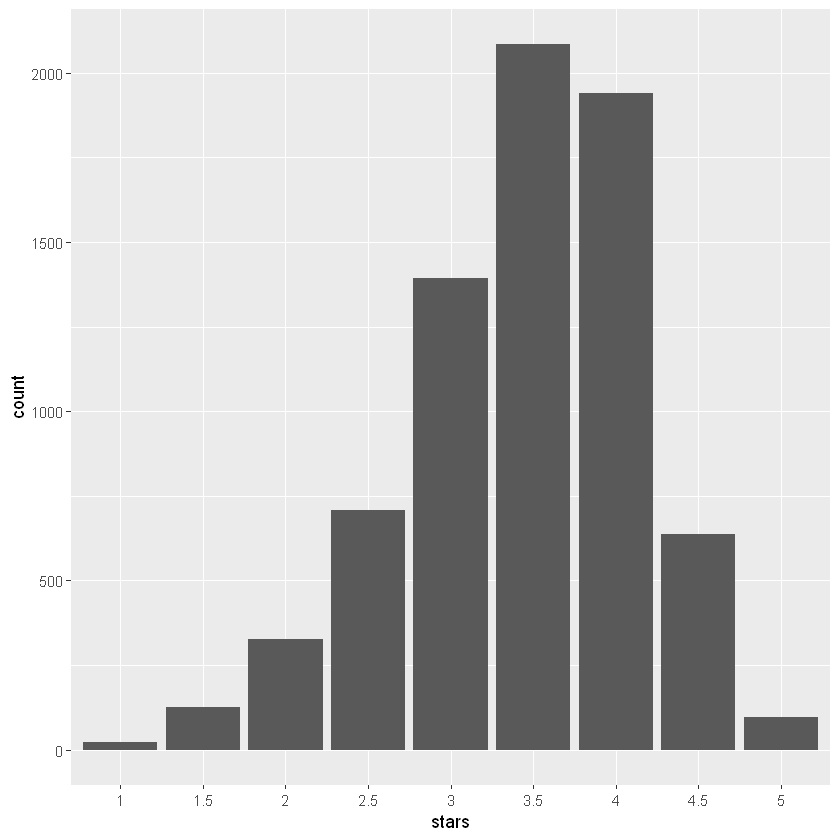

In [55]:
# plot histogram of stars variable
ggplot(data, aes(stars)) + geom_bar()


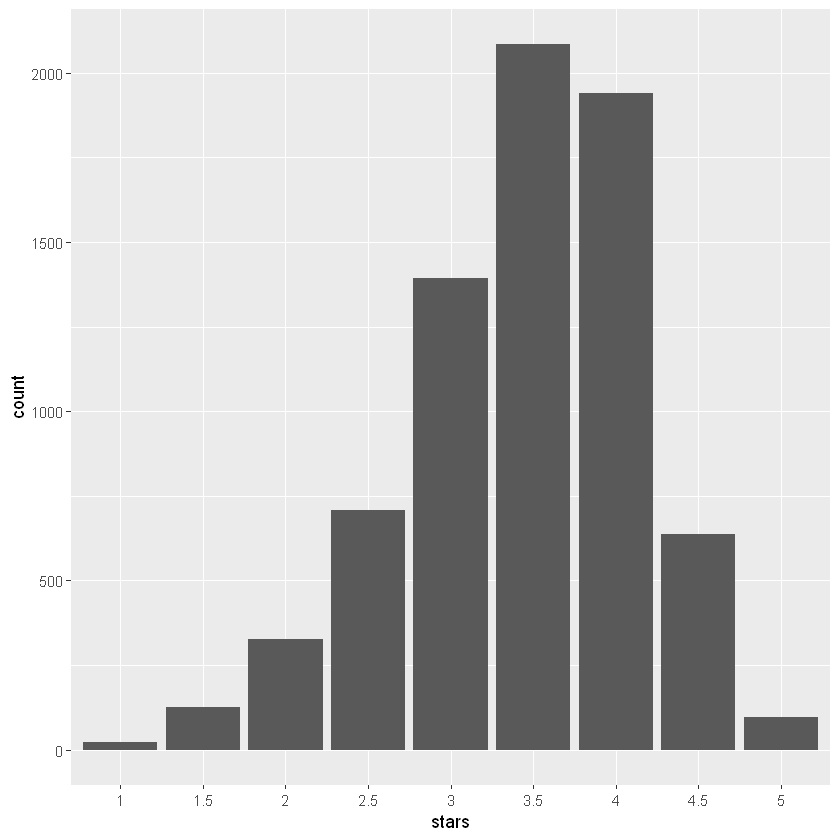

In [56]:
ggplot(data, aes(stars, color = review_count)) + geom_bar()



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


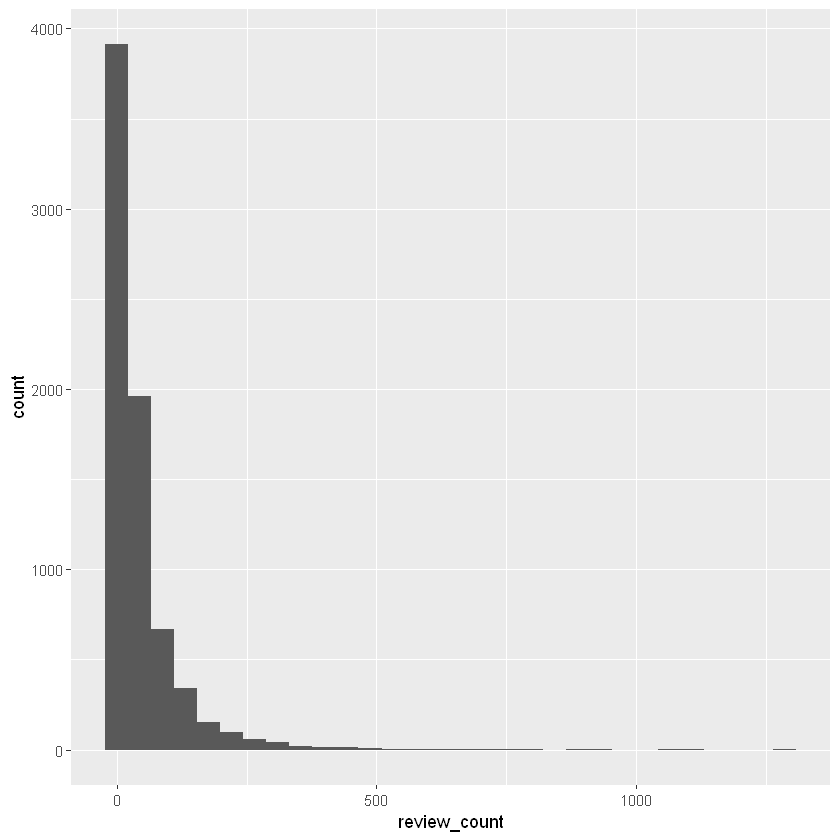

In [57]:
# plot histogram of review_count variable
ggplot(data, aes(review_count)) + geom_histogram()

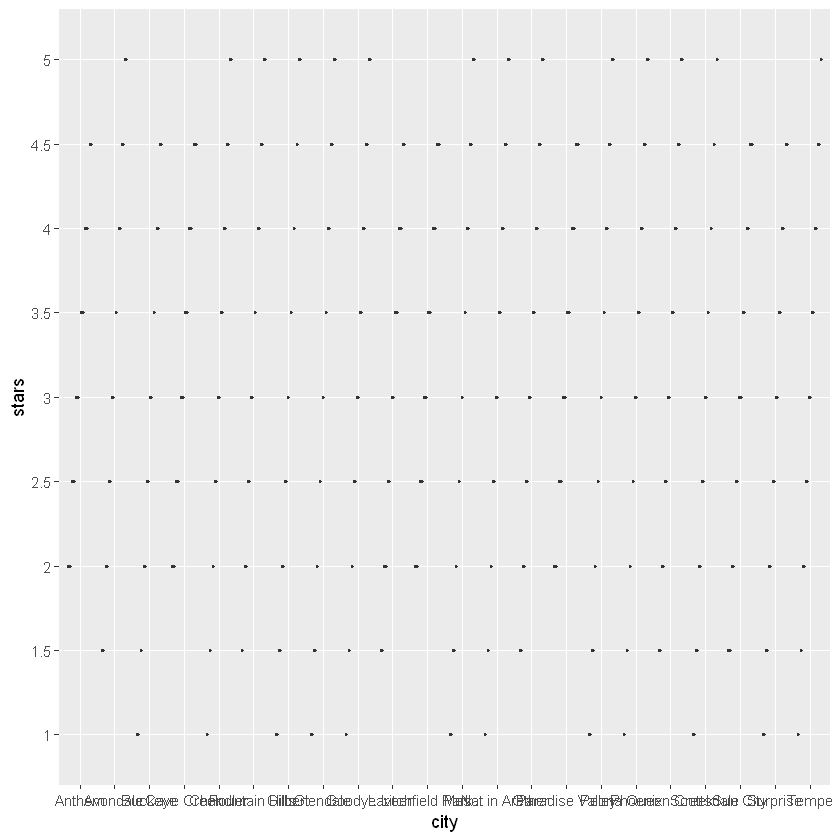

In [58]:
# plot histogram of stars variable
ggplot(data, aes(city, stars)) + geom_boxplot()


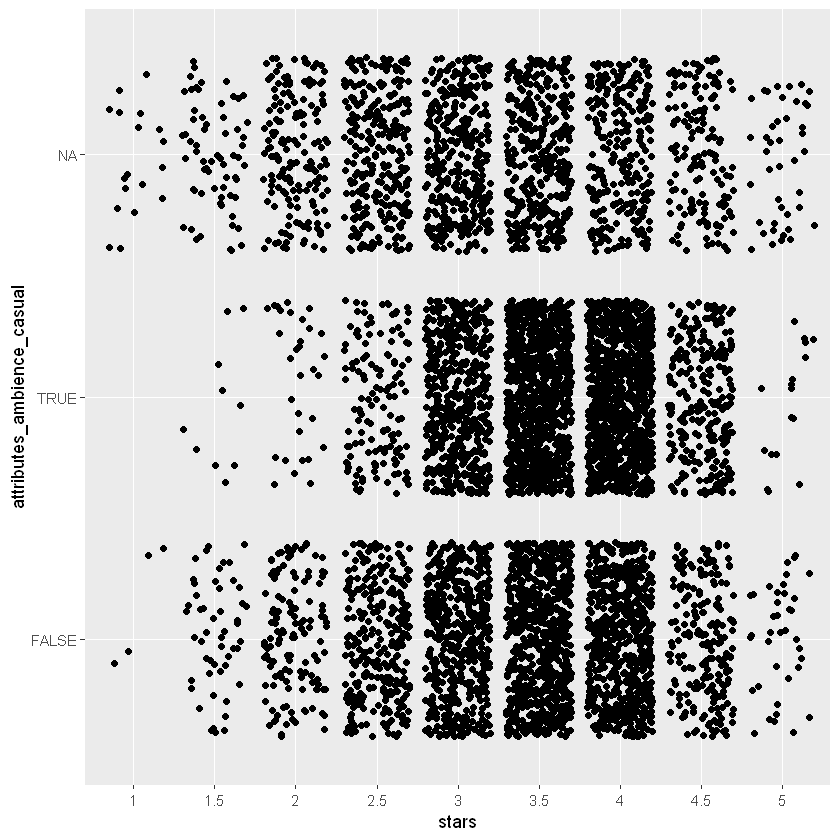

In [59]:
ggplot(data, aes(stars, attributes_ambience_casual)) + geom_jitter()


Warning message:
"Removed 416 rows containing missing values (geom_point)."

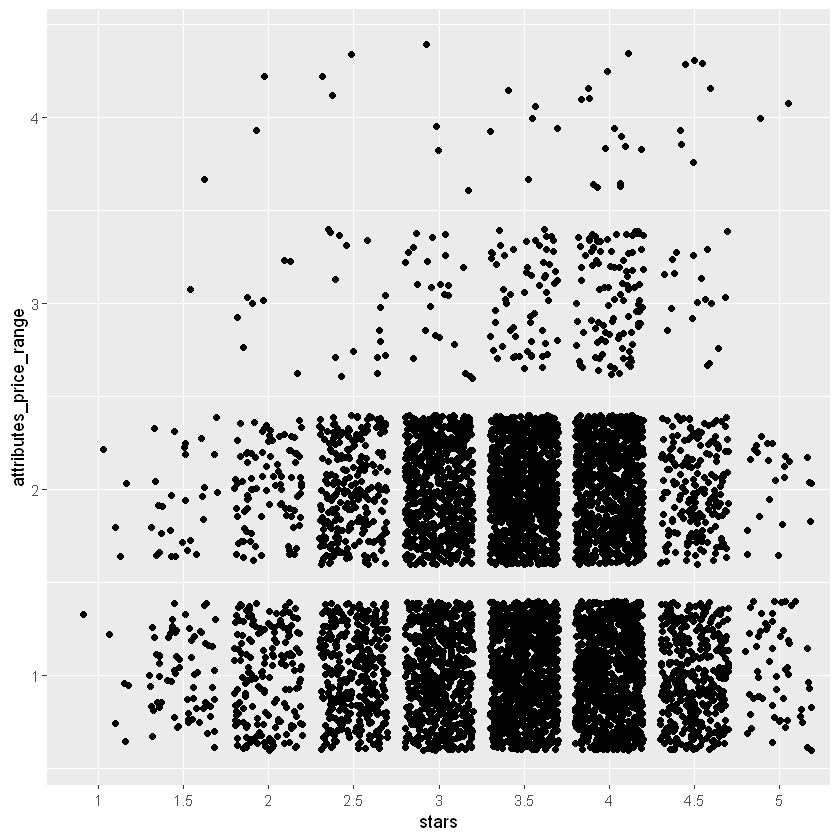

In [60]:
# plot histogram of stars variable
ggplot(data, aes(stars, attributes_price_range)) + geom_jitter()

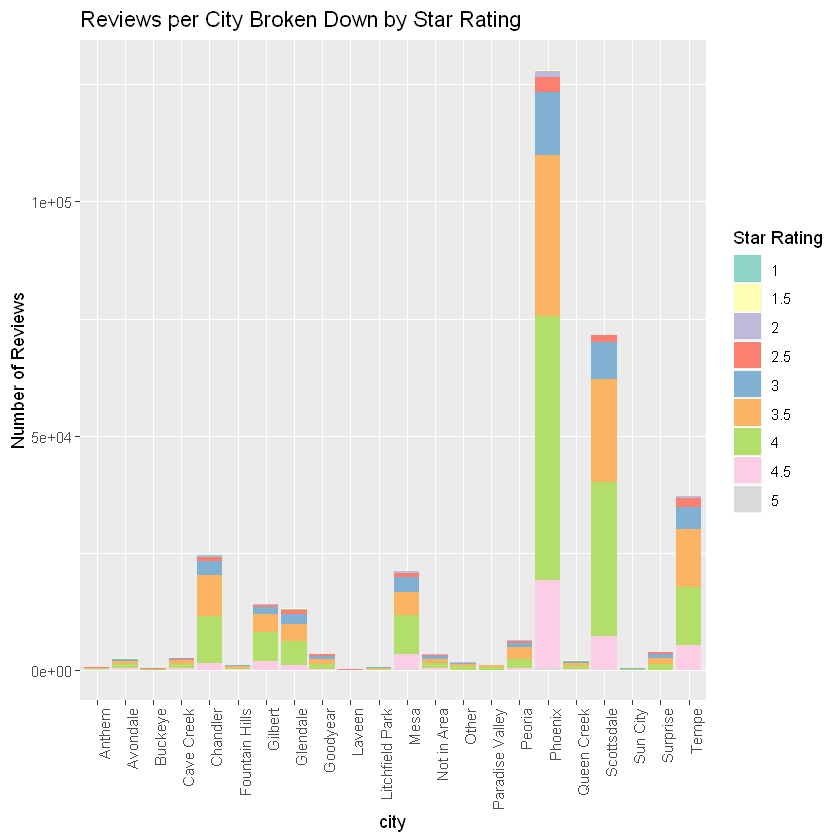

In [61]:
# plot histogram of stars variable
ggplot(data, aes(city, review_count, fill=stars)) + 
  geom_col(position='stack') +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_brewer(palette='Set3') +
  ggtitle('Reviews per City Broken Down by Star Rating') +
  ylab('Number of Reviews') +
  labs(fill = "Star Rating")




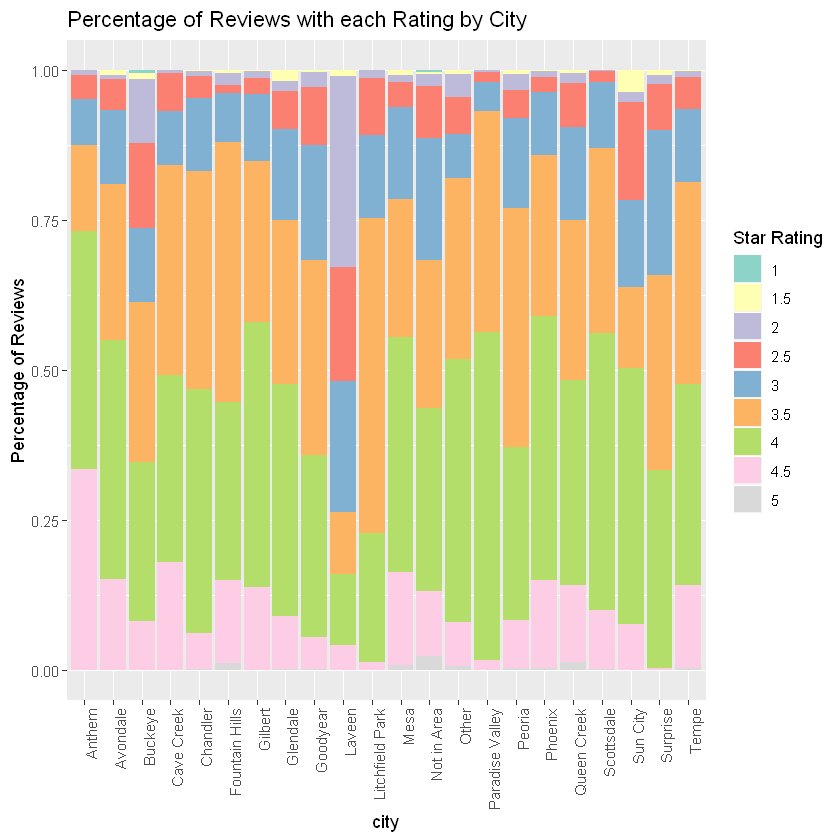

In [62]:
# plot histogram of stars variable
ggplot(data, aes(city, review_count, fill=stars)) + 
  geom_col(position='fill') +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_brewer(palette='Set3') +
  ggtitle('Percentage of Reviews with each Rating by City') +
  ylab('Percentage of Reviews') +
  labs(fill = "Star Rating")

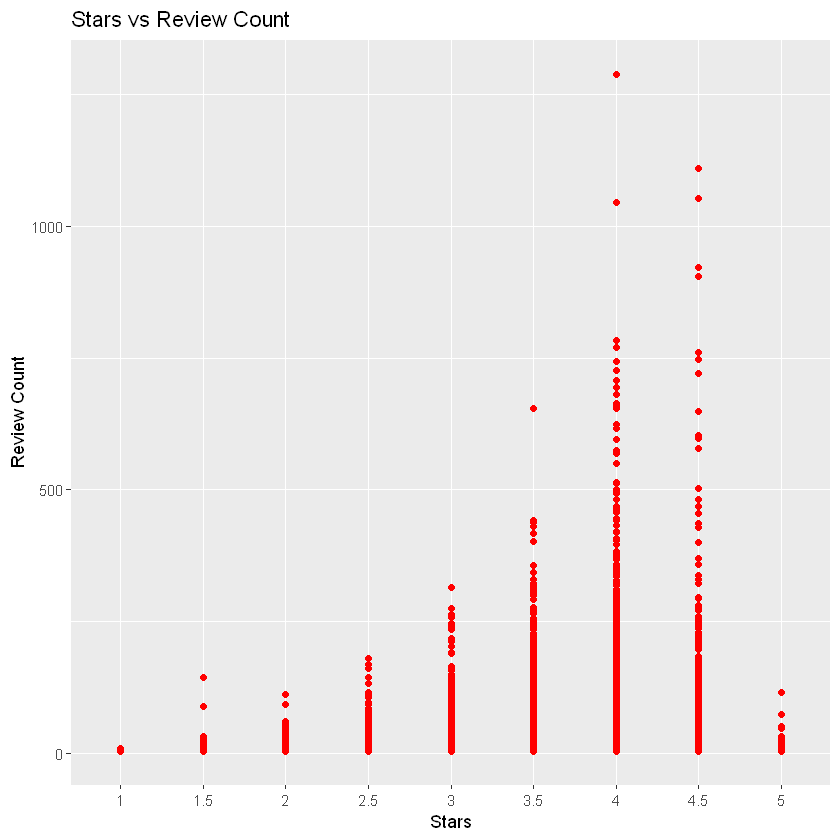

In [125]:
ggplot(data, aes(x=stars, y=review_count)) + geom_point(color='red') +
  scale_fill_brewer(palette='Set3') +
  ggtitle('Stars vs Review Count') +
  xlab('Stars') +
  ylab('Review Count')

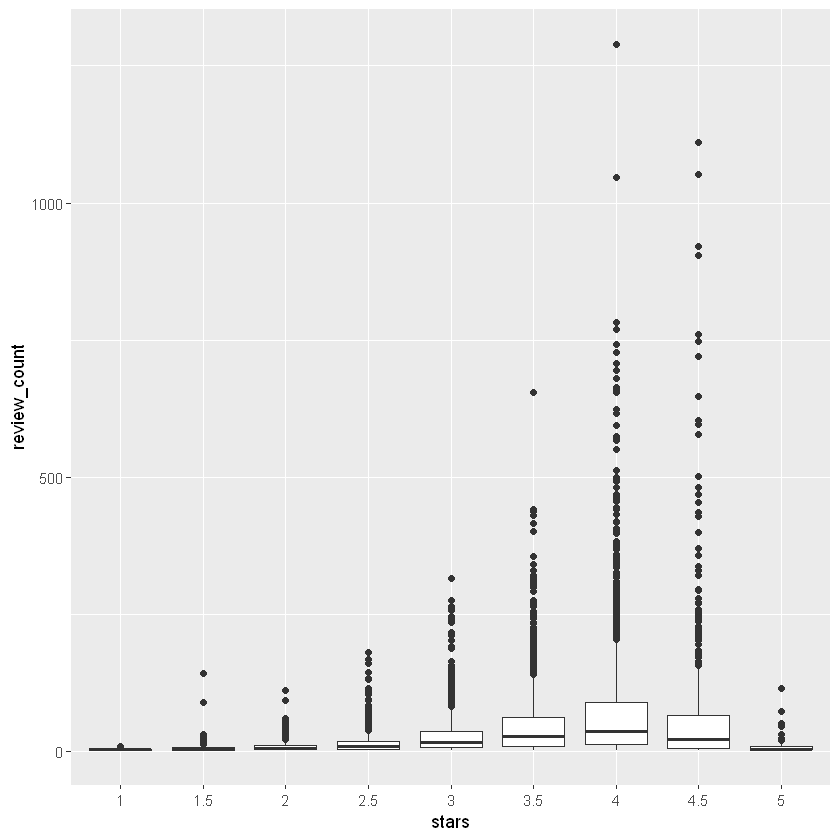

In [64]:
ggplot(data, aes(x=stars, y=review_count)) + geom_boxplot()

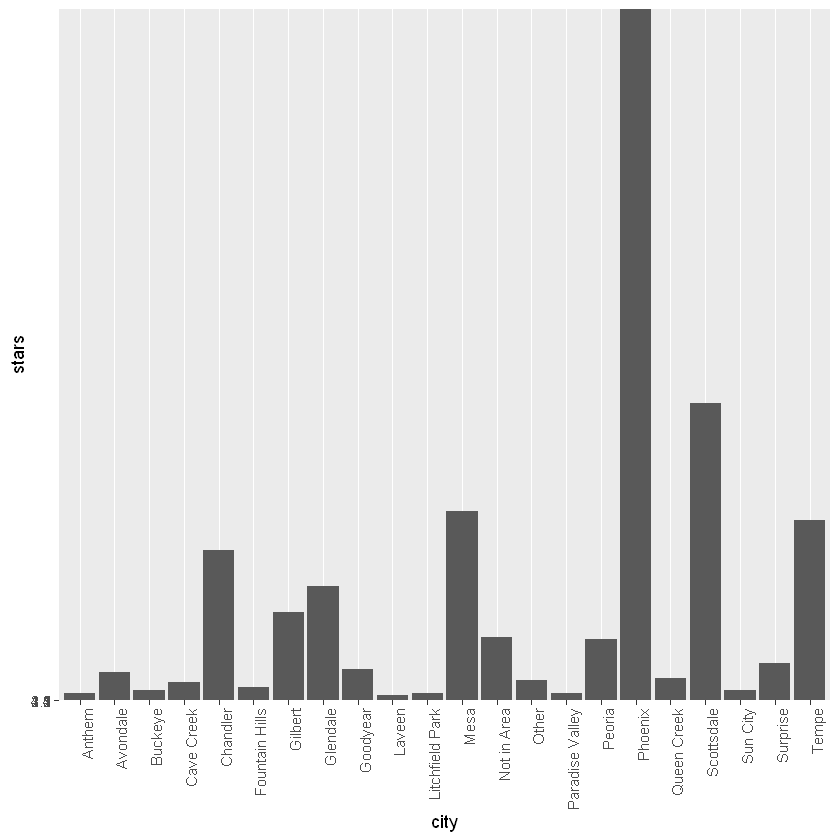

In [65]:
ggplot(data, aes(city, stars)) +
  geom_col() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  


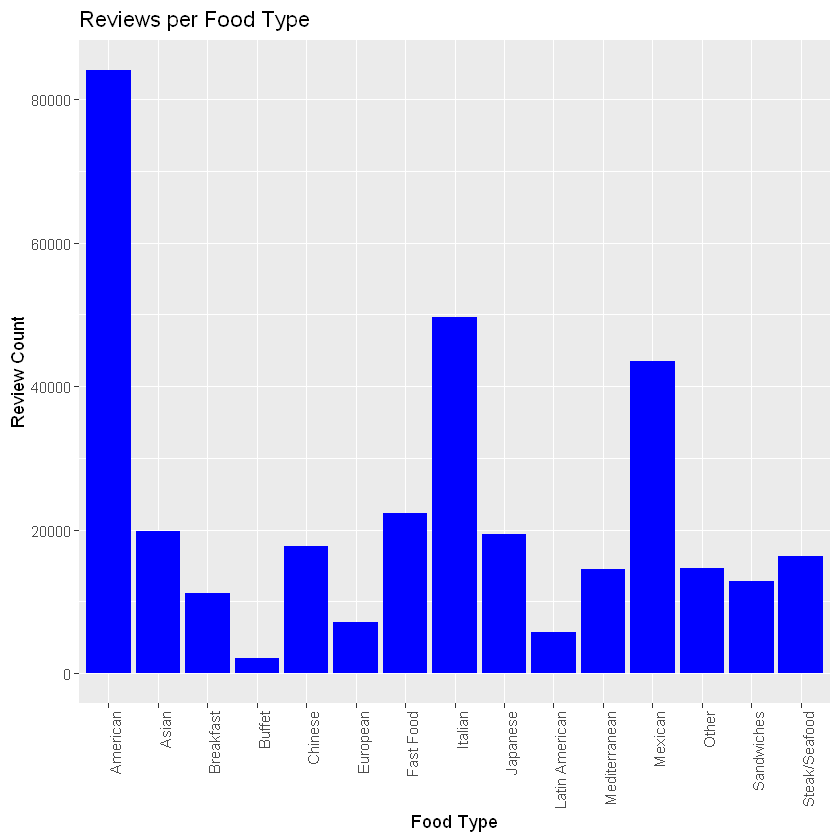

In [114]:
ggplot(data, aes(food_type, review_count)) + geom_col(position='stack', fill='blue') +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_brewer(palette='Set3') +
  ggtitle('Reviews per Food Type') +
  xlab('Food Type') +
  ylab('Review Count') +
  theme(legend.title = element_blank())
        




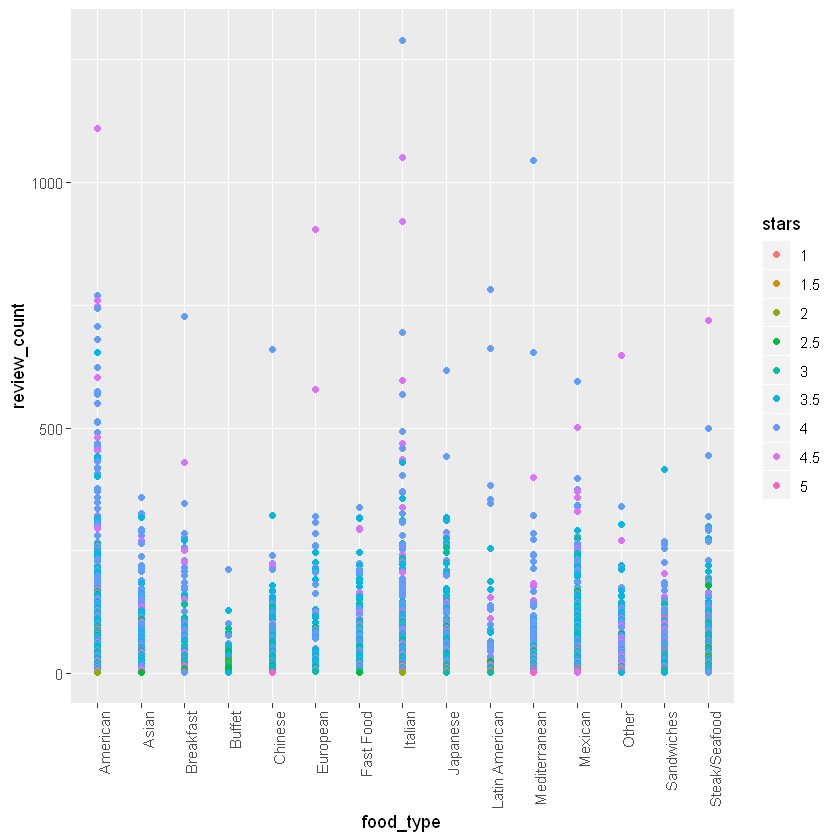

In [67]:
ggplot(data, aes(food_type, review_count, color = stars)) + geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
scale_fill_brewer(palette='Set2')


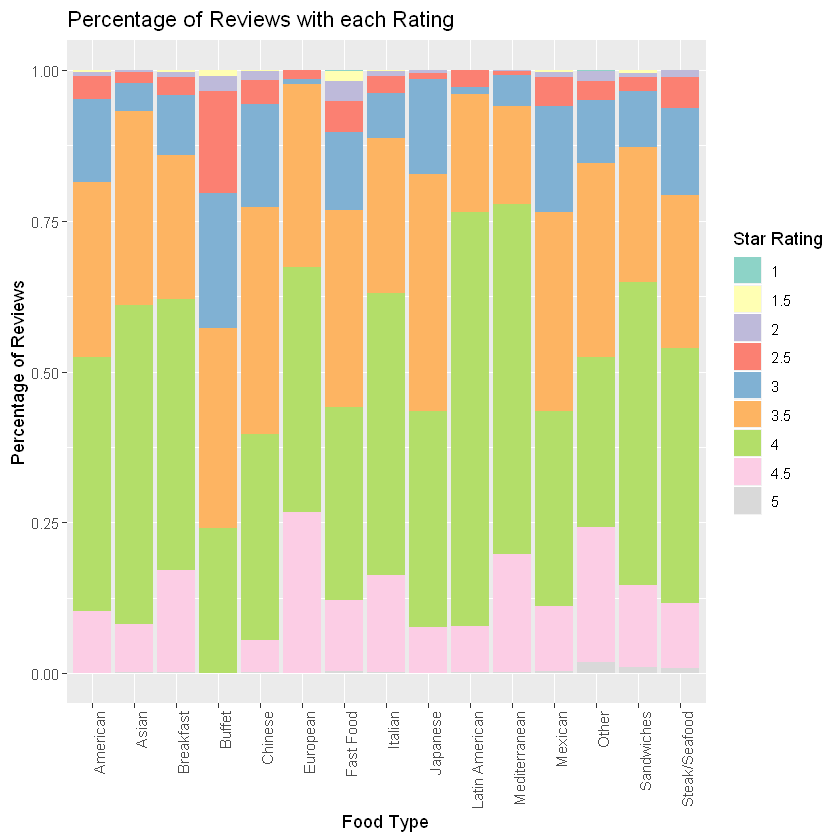

In [98]:
ggplot(data, aes(food_type, review_count, fill= stars, )) + geom_col(position='fill') +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_brewer(palette='Set3') +
  ggtitle('Percentage of Reviews with each Rating') +
  xlab('Food Type') +
  ylab('Percentage of Reviews') +
  labs(fill = "Star Rating")

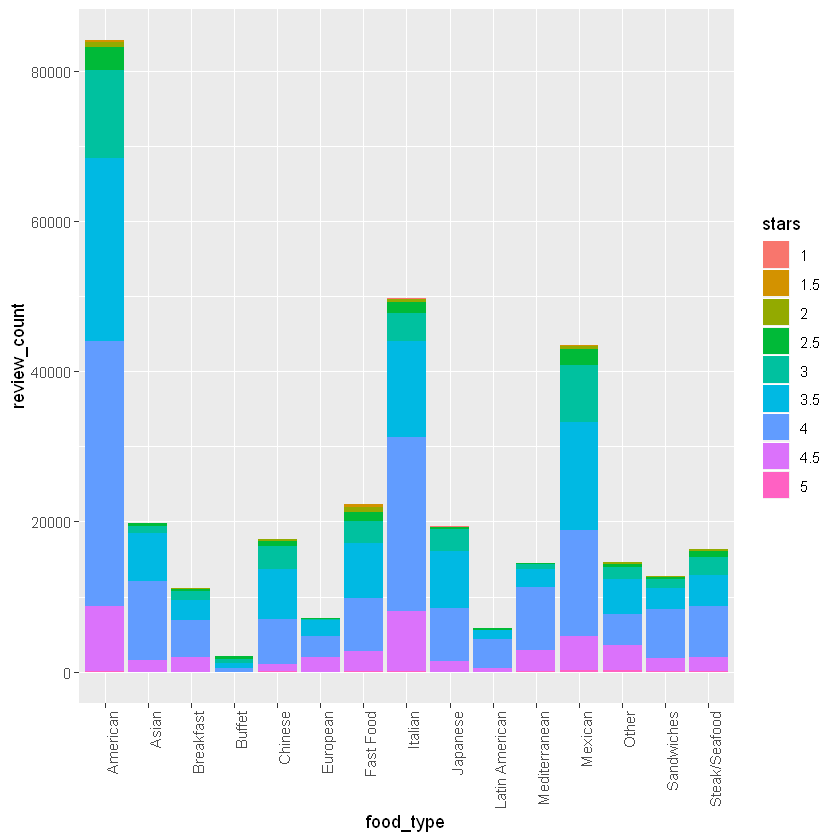

In [69]:
ggplot(data, aes(food_type, review_count, fill= stars)) + geom_col() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  



Warning message:
"Removed 416 rows containing missing values (geom_point)."

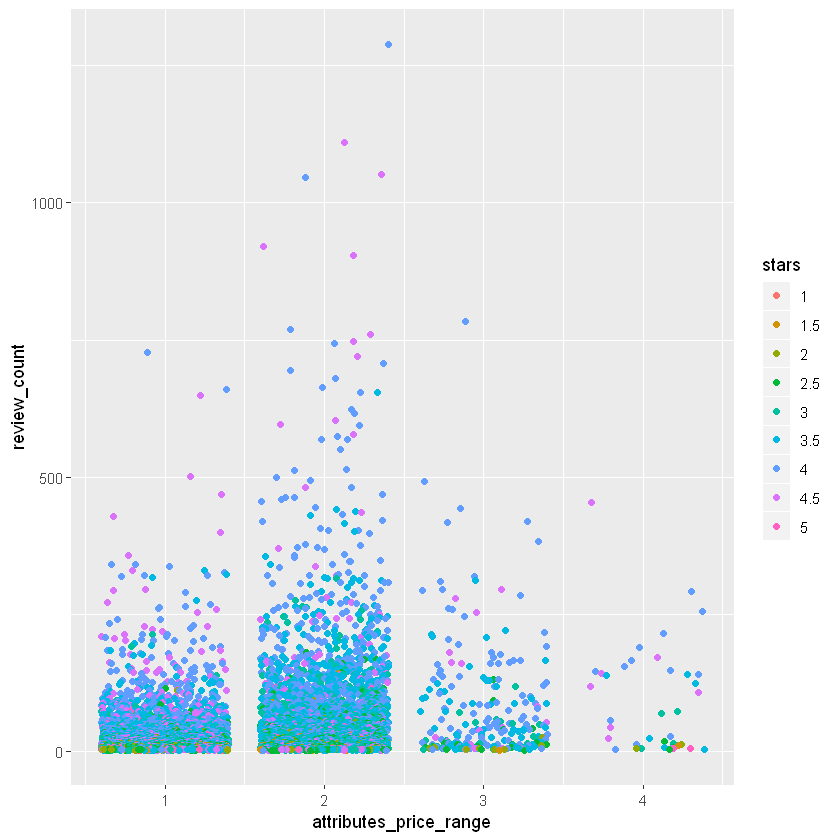

In [70]:
ggplot(data, aes(attributes_price_range, review_count, color=stars)) + geom_jitter()

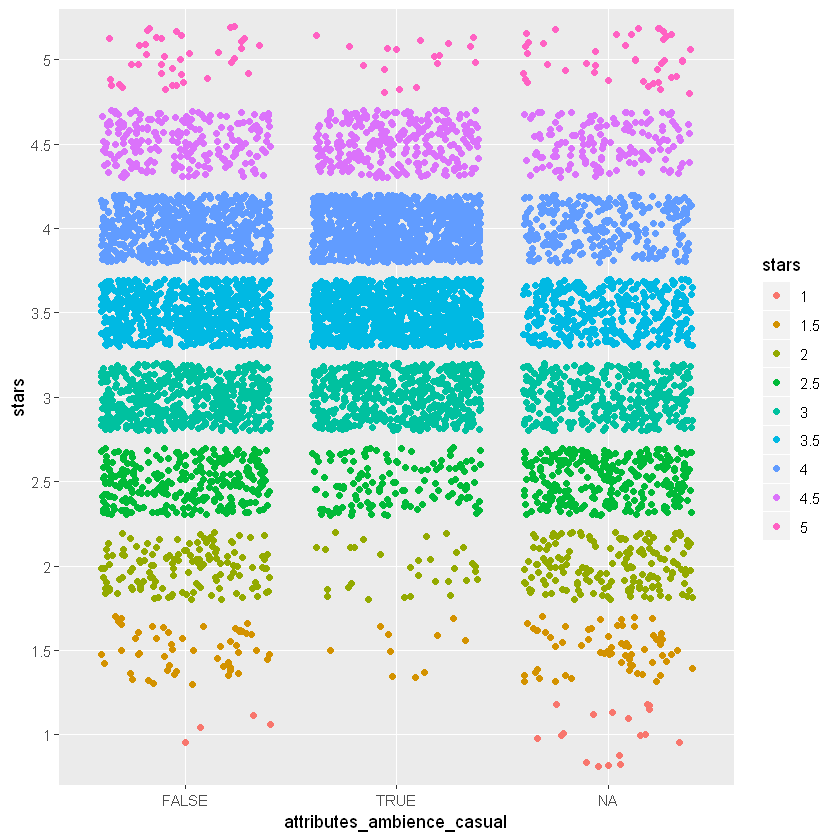

In [71]:
casual <- data %>%
  select(stars, attributes_ambience_casual, review_count)
  # filter(attributes_ambience_casual == TRUE) %>%
 

ggplot(casual, aes(attributes_ambience_casual, stars, color = stars)) + geom_jitter() 


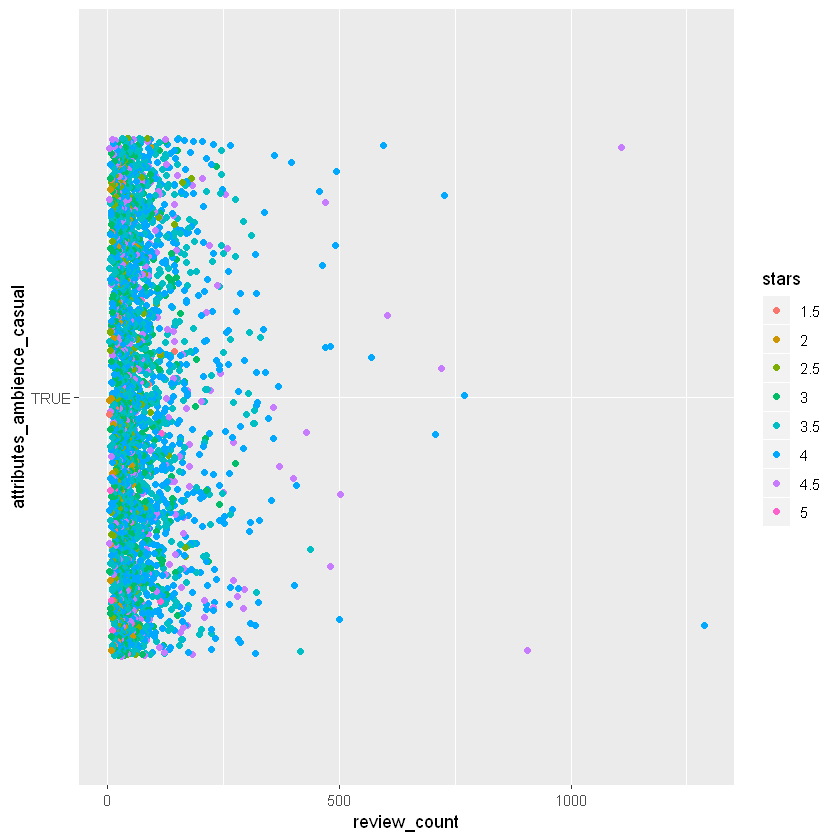

In [72]:
casual <- data %>%
  select(stars, attributes_ambience_casual, review_count) %>%
  filter(attributes_ambience_casual == TRUE) %>%
  group_by(stars)
  

ggplot(casual, aes(review_count, attributes_ambience_casual, color = stars)) + geom_jitter()


Warning message:
"Removed 416 rows containing missing values (geom_point)."

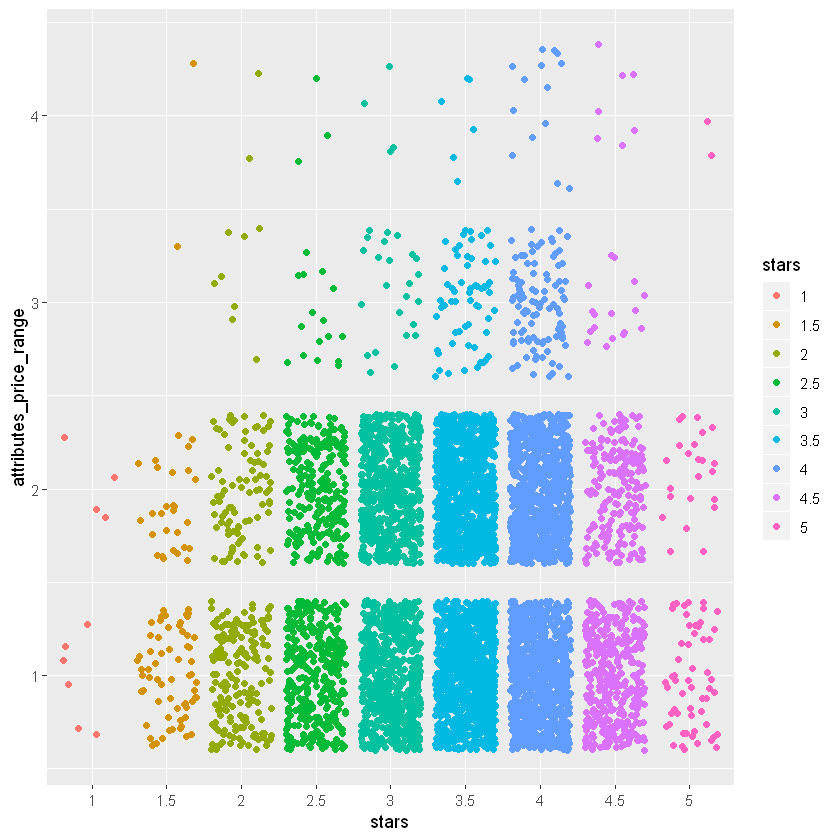

In [73]:
attributes <- data %>%
  select(stars, attributes_price_range, review_count, attributes_ambience_casual, attributes_parking_lot, attributes_ambience_touristy,
    attributes_ambience_upscale, attributes_ambience_romantic, attributes_ambience_intimate,
    attributes_ambience_classy, attributes_ambience_hipster, attributes_ambience_divey,
    attributes_ambience_trendy, attributes_parking_validated)

      

ggplot(attributes, aes(stars, attributes_price_range, color = stars)) + geom_jitter()




Warning message:
"Removed 416 rows containing missing values (geom_point)."

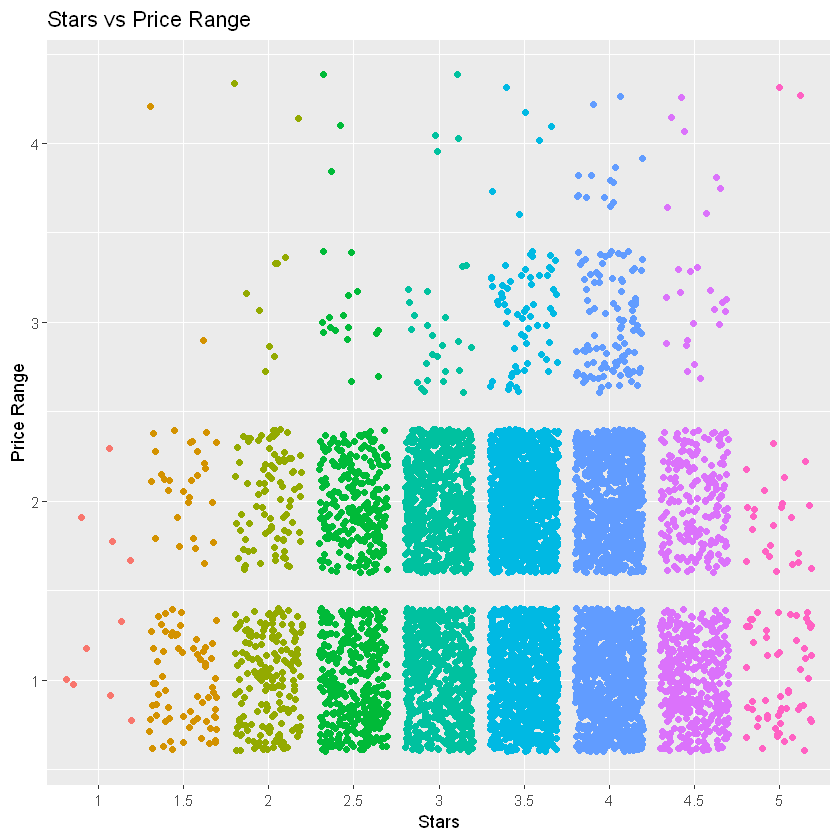

In [124]:
ggplot(attributes, aes(stars, attributes_price_range, color = stars)) + geom_jitter() +
  theme(legend.position = "none") +
  ggtitle('Stars vs Price Range') +
  xlab('Stars') +
  ylab('Price Range')


In [75]:
# Cross-Tables below

In [76]:
# display cross table of price range and stars
y = table(data$attributes_price_range, data$stars)
y

   
      1 1.5   2 2.5   3 3.5   4 4.5   5
  1   6  68 178 359 623 944 915 380  56
  2   4  28  90 259 669 997 857 195  23
  3   0   1   8  16  24  62 100  18   0
  4   0   1   2   3   4   6  14   7   2

In [77]:
# display frequency table of price range and stars
prop.table(y, 2)


   
              1         1.5           2         2.5           3         3.5
  1 0.600000000 0.693877551 0.640287770 0.563579278 0.471969697 0.469885515
  2 0.400000000 0.285714286 0.323741007 0.406593407 0.506818182 0.496266799
  3 0.000000000 0.010204082 0.028776978 0.025117739 0.018181818 0.030861125
  4 0.000000000 0.010204082 0.007194245 0.004709576 0.003030303 0.002986560
   
              4         4.5           5
  1 0.485153765 0.633333333 0.691358025
  2 0.454400848 0.325000000 0.283950617
  3 0.053022269 0.030000000 0.000000000
  4 0.007423118 0.011666667 0.024691358

In [78]:
x <- table(data$stars, data$attributes_alcohol)

x

     
          beer_and_wine full_bar none
  1    15             1        0    6
  1.5  50             2       15   58
  2   112            11       56  149
  2.5 182            39      181  307
  3   197           135      532  529
  3.5 226           274      806  779
  4   161           329      650  799
  4.5  85            96      127  329
  5    35             6       11   45

In [79]:
prop.table(x, 2)

     
                  beer_and_wine    full_bar        none
  1   0.014111007   0.001119821 0.000000000 0.001999334
  1.5 0.047036689   0.002239642 0.006307822 0.019326891
  2   0.105362183   0.012318029 0.023549201 0.049650117
  2.5 0.171213547   0.043673012 0.076114382 0.102299234
  3   0.185324553   0.151175812 0.223717410 0.176274575
  3.5 0.212605833   0.306830907 0.338940286 0.259580140
  4   0.151458137   0.368421053 0.273338940 0.266244585
  4.5 0.079962371   0.107502800 0.053406224 0.109630123
  5   0.032925682   0.006718925 0.004625736 0.014995002

In [80]:
table(data$stars, data$attributes_attire)

     
           casual dressy formal
  1      9     13      0      0
  1.5   29     95      1      0
  2     73    251      2      2
  2.5   94    603      7      5
  3     92   1292      7      2
  3.5   92   1955     35      3
  4     73   1804     60      2
  4.5   50    569     18      0
  5     18     76      1      2

In [81]:
cor(as.numeric(data$stars), as.numeric(data$attributes_price_range))

# WHY AM I GETTING NA

[1] NA

In [82]:
head(data)

business_id            attributes_ambience_divey
1 VVeogjZya58oiTxK7qUjAQ FALSE                    
2 JokKtdXU7zXHcr20Lrk29A FALSE                    
3 V1nEpIRmEa1768oj_tuxeQ FALSE                    
4 EWMwV5V9BxNs_U6nNVMeqw FALSE                    
5 SDwYQ6eSu1htn8vHWv128g FALSE                    
6 WNy1uzcmm_UHmTyR--o5IA FALSE                    
  categories                                                      latitude
1 Italian;Pizza;Sandwiches;Restaurants                            33.44923
2 Bars;Food;Breweries;Pubs;Nightlife;American (New);Restaurants   33.41957
3 Italian;Pizza;Sandwiches;Restaurants                            33.45496
4 Bars;Mediterranean;Nightlife;Lounges;American (New);Restaurants 33.49170
5 Wine Bars;Bars;Restaurants;Nightlife;Italian                    33.50219
6 Pubs;Bars;Nightlife;British;Restaurants                         33.42273
  attributes_outdoor_seating attributes_alcohol attributes_ambience_classy
1 FALSE                      beer_and_wine      FALSE                     
2  TRUE                      full_bar           FALSE                     
3  TRUE                      beer_and_wine      FALSE                     
4  TRUE                      full_bar           FALSE                     
5  TRUE                      beer_and_wine      FALSE                     
6  TRUE                      full_bar           FALSE                     
  attributes_parking_lot attributes_ambience_touristy name                 
1  TRUE                  FALSE                        Pizzeria Bianco      
2  TRUE                  FALSE                        Four Peaks Brewing Co
3  TRUE                  FALSE                        Cibo                 
4  TRUE                  FALSE                        FEZ                  
5 FALSE                  FALSE                        Postino Arcadia      
6  TRUE                  FALSE                        Cornish Pasty Company
  attributes_waiter_service attributes_parking_street
1  TRUE                      TRUE                    
2  TRUE                      TRUE                    
3  TRUE                      TRUE                    
4  TRUE                     FALSE                    
5  TRUE                     FALSE                    
6 FALSE                     FALSE                    
  attributes_ambience_hipster attributes_price_range attributes_parking_garage
1 FALSE                       2                       TRUE                    
2 FALSE                       2                      FALSE                    
3 FALSE                       2                      FALSE                    
4 FALSE                       2                      FALSE                    
5 FALSE                       2                      FALSE                    
6 FALSE                       2                      FALSE                    
  review_count attributes_accepts_credit_cards attributes_parking_valet
1 1289         TRUE                            FALSE                   
2 1110         TRUE                            FALSE                   
3 1052         TRUE                             TRUE                   
4 1046         TRUE                            FALSE                   
5  921         TRUE                             TRUE                   
6  905         TRUE                            FALSE                   
  attributes_take_out full_address                           
1 FALSE               623 E Adams St\nPhoenix, AZ 85004      
2  TRUE               1340 E 8th St\nSte 104\nTempe, AZ 85281
3  TRUE               603 N 5th Ave\nPhoenix, AZ 85003       
4  TRUE               3815 N Central Ave\nPhoenix, AZ 85012  
5  TRUE               3939 E Campbell Ave\nPhoenix, AZ 85018 
6  TRUE               960 W University Dr\nTempe, AZ 85281   
  attributes_takes_reservations attributes_ambience_trendy attributes_delivery
1 FALSE                         FALSE                      FALSE              
2  TRUE                         FALS

In [83]:
# names(data)

In [84]:
# library(pander)
# panderOptions("table.split.cells", Inf)

# summarytools::freq(data[1:35])



In [85]:
# freq(data, report.nas = FALSE, totals = FALSE, 
  #   cumul = FALSE, headings = FALSE)


In [86]:
library(tidyr)

# if missing values > 20-25% then exlcude;
# otherwise impute
# data <- data %>% 
#  replace(., is.na(.), FALSE)

# head(data)